In [1]:
import pandas as pd
import numpy as np

filename = 'BRAZPD_UnofM_all.csv'

df = pd.read_csv(filename, engine='python')


In [2]:
display(df)

,CODPAX,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,Mean_PAS_2T,Mean_PAD_2T,Mean_PAS_3T,Mean_PAD_3T,...,Diastolic70,Systolic71,Diastolic71,Systolic72,Diastolic72,Systolic73,Diastolic73,Systolic74,Diastolic74,_merge
0,1349037,12.933333,4.433333,5.300000,110.500000,70.000000,125.000000,80.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,1349040,14.000000,3.766667,5.933333,129.500000,77.000000,120.333333,68.666667,136.000000,82.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,1349048,11.833333,4.366667,6.100000,158.000000,81.000000,154.666667,87.666667,147.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1349051,10.066667,4.733333,5.533333,140.000000,75.000000,147.333333,92.333333,169.333333,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,1349055,11.933333,4.033333,4.066667,103.500000,60.000000,154.666667,82.000000,129.333333,72.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,126.666667,76.666667,126.666667,83.333333,120.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5703,347457071,9.700000,4.300000,3.233333,130.000000,80.000000,113.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5704,347457072,10.466667,4.433333,4.466667,136.666667,80.000000,143.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5705,347457073,11.766667,4.533333,3.566667,126.666667,80.000000,136.666667,83.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


# Data Cleaning

In [3]:
import re

nMeasurements = 75
nColumns = 1735
nRecords = 5707
timeseries_names = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit','Volume_Total', 'Systolic', 'Diastolic', 'N_AH_']

different_format_ts_names = ['Mes_1_PAS', 'Mes_1_PAD', 'Mes_1_Uso_de_anti_hipert', 'Mes_1_inibidor',\
                             'Mes_1_beta', 'Mes_1_ant', 'Mes_1_diu', 'Mes_1_at_i', 'Mes_1_OUTROS']

# Put timeseries names into standard format
p = re.compile('[0-9]')
strip = re.compile('Mes_[0-9]_')
for timeseries in different_format_ts_names:
    for i in range(1,nMeasurements):
        try:
            old_label = p.sub(str(i), timeseries)
            new_label = strip.sub('',timeseries)
            df[new_label+str(i)] = pd.Series(df[old_label])
            df.drop([old_label],axis=1, inplace=True)
        except:
            print(f'Column {timeseries}{i} does not exist')
    timeseries_names.append(new_label)
    
# make sure we don't have duplicate columns
assert nColumns == df.shape[1]

display(df)

,CODPAX,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,Mean_PAS_2T,Mean_PAD_2T,Mean_PAS_3T,Mean_PAD_3T,...,OUTROS65,OUTROS66,OUTROS67,OUTROS68,OUTROS69,OUTROS70,OUTROS71,OUTROS72,OUTROS73,OUTROS74
0,1349037,12.933333,4.433333,5.300000,110.500000,70.000000,125.000000,80.000000,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1349040,14.000000,3.766667,5.933333,129.500000,77.000000,120.333333,68.666667,136.000000,82.000000,...,0,0,0,0,0,0,0,0,0,0
2,1349048,11.833333,4.366667,6.100000,158.000000,81.000000,154.666667,87.666667,147.000000,80.000000,...,0,0,0,0,0,0,0,0,0,0
3,1349051,10.066667,4.733333,5.533333,140.000000,75.000000,147.333333,92.333333,169.333333,99.000000,...,0,0,0,0,0,0,0,0,0,0
4,1349055,11.933333,4.033333,4.066667,103.500000,60.000000,154.666667,82.000000,129.333333,72.666667,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,126.666667,76.666667,126.666667,83.333333,120.000000,80.000000,...,0,0,0,0,0,0,0,0,0,0
5703,347457071,9.700000,4.300000,3.233333,130.000000,80.000000,113.333333,73.333333,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5704,347457072,10.466667,4.433333,4.466667,136.666667,80.000000,143.333333,73.333333,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5705,347457073,11.766667,4.533333,3.566667,126.666667,80.000000,136.666667,83.333333,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection and Combination

In [4]:
# Separate features to unique features and time series features
timeseries_cols = []
time_indices = str(np.arange(100))
# print(time_indices)
for col in list(df.columns):
    add = True
    for idx in time_indices:
        if idx in col:
            add = False
    if add == False:
        timeseries_cols.append(col)
        
# Adjust missclassified features
adjlist = ['ModalidadeCAPD0APD1Mix2', 'Dropoutsim1', 'Agedic65', 'Educationdic4y', 
           'Followup1y', 'Followup2y', 'Followup3y', "death_event_1y","Tech_event_1y",
          "death_event_2y","Tech_event_2y", "death_event_3y","Tech_event_3y"]
for i in range(len(adjlist)):
    timeseries_cols.remove(adjlist[i])
    
unique_cols = ['Hemoglobin', 'Potassium', 'Phosphate',\
                'Mean_PAS_1T', 'Mean_PAD_1T',\
                 'FRR', 'codigoclinica', 'ModalidadeCAPD0APD1Mix2',\
                'CenterSizenpatients', 'ModalidadeDPInicial', 'Age',\
                'BMI', 'IncidentinPD', 'PrevalentinPDNet', \
                'DialysisvintageprePDNet', 'totaldialysisvintage',\
                'Educationlevel', 'Primaryrenaldisease', 'PreviousHD',\
                'Previoustx', 'DaviesScore', 'Peripheralarterydisease',\
                'DM', 'CAD', 'LVH', 'LES', 'HF', 'Cancer', 'Stroke',\
                'Hypertension', 'HIV', 'HCV', 'HBC', 'Gender', 'Race',\
                'Familyincome', 'Distancefromcenter', 'predialysiscare',\
                'timeofpredialysiscare', 'Agedic65', 'Racedicwhite', 'Educationdic4y',\
                'Daviesdic', 'Incomesdic', 'Region', 'Centerexperiencepatientyear',\
                'Regionsdic', 'cidade', 'BMI_Cat',\
                'BMI_dic']

print(unique_cols)
print(timeseries_cols)

['Hemoglobin', 'Potassium', 'Phosphate', 'Mean_PAS_1T', 'Mean_PAD_1T', 'FRR', 'codigoclinica', 'ModalidadeCAPD0APD1Mix2', 'CenterSizenpatients', 'ModalidadeDPInicial', 'Age', 'BMI', 'IncidentinPD', 'PrevalentinPDNet', 'DialysisvintageprePDNet', 'totaldialysisvintage', 'Educationlevel', 'Primaryrenaldisease', 'PreviousHD', 'Previoustx', 'DaviesScore', 'Peripheralarterydisease', 'DM', 'CAD', 'LVH', 'LES', 'HF', 'Cancer', 'Stroke', 'Hypertension', 'HIV', 'HCV', 'HBC', 'Gender', 'Race', 'Familyincome', 'Distancefromcenter', 'predialysiscare', 'timeofpredialysiscare', 'Agedic65', 'Racedicwhite', 'Educationdic4y', 'Daviesdic', 'Incomesdic', 'Region', 'Centerexperiencepatientyear', 'Regionsdic', 'cidade', 'BMI_Cat', 'BMI_dic']
['Mean_PAS_1T', 'Mean_PAD_1T', 'Mean_PAS_2T', 'Mean_PAD_2T', 'Mean_PAS_3T', 'Mean_PAD_3T', 'Mean_PAS_4T', 'Mean_PAD_4T', 'Mean_PAS_5T', 'Mean_PAD_5T', 'Mean_PAS_6T', 'Mean_PAD_6T', 'Mean_PAS_7T', 'Mean_PAD_7T', 'Mean_PAS_8T', 'Mean_PAD_8T', 'CR_death_event_1y', 'CR_deat

In [12]:
# build baseline dataframe (without time-series data):
df_baseline = df[unique_cols].copy()
df_baseline = df_baseline.fillna(0)
# display(df_baseline)

targets = ['Dropoutsim1', 'Followup1y', 'Followup2y', 'Followup3y',\
           "death_event_1y","Tech_event_1y",\
           "death_event_2y","Tech_event_2y",\
           "death_event_3y","Tech_event_3y",\
           "Deathevent","TechniqueFailureevent","Causeofdeath","TechFailureDeathnotcens","Causeofdropout",\
           "Followup"]

# build targets dataframe:
Y = df[targets+['CODPAX']].copy()
# display(Y)

In [6]:
df_totalaverage = df[unique_cols].copy()

Group_p1 = []
Ms10ou_p1 = []

storage_p1 = [Group_p1, Ms10ou_p1]

Mean_PAS_p1 = []
Mean_PAD_p1 = []

Mean_PAS_p2 = []
Mean_PAD_p2 = []

storage_p2 = [Mean_PAS_p1, Mean_PAD_p1, Mean_PAS_p2, Mean_PAD_p2]

Ureia = dict()
Creatinine = dict()
TGP = dict()
Potassium = dict()
Calcium = dict()
Phosphate = dict()
Glucose = dict()
Hemoglobin = dict()
Hematocrit = dict()
Volume_Total = dict()
N_AH_ = dict()
Systolic = dict()
Diastolic = dict()
PAS = dict()
PAD = dict()
Uso_de_anti_hipert = dict()
inibidor = dict()


label_dict = [Ureia, Creatinine, TGP, Potassium, Calcium, Phosphate, Glucose, 
              Hemoglobin, Hematocrit, Volume_Total, N_AH_, Systolic, Diastolic, PAS, PAD, Uso_de_anti_hipert, inibidor]

label_str = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit','Volume_Total', 'N_AH_', 'Systolic', 'Diastolic','PAS','PAD',
             'Uso_de_anti_hipert', 'inibidor']

for item in label_dict:
    for i in range(13):
        key = 'p'+str(i+1)
        item[key] = []
    
label_idx = 0    
for item in label_dict:
    count = 0
    section = 1
    labelname = label_str[label_idx]
    for col in timeseries_cols:
        if labelname in col:
            if 'Mean_' not in col:            
                if count < 6:
                    count = count + 1
                else:
                    section = section + 1
                    count = 1
                key = 'p'+str(section)
                item[key].append(col)
    label_idx = label_idx + 1

indices_p1 = ['Group', 'Ms10ou']

indices_p2 = ['Mean_PAS', 'Mean_PAD']



# Select certain features as 1 section
for col in timeseries_cols:
    i = 0
    for idx in indices_p1:
        if idx in col:
            storage_p1[i].append(col)
        i = i + 1
# print(storage_p1)

# Separate certain features to 2 sections (each section contains 4 features)
i = 0 # i is the index of feature name
for idx in indices_p2:
    p = 0
    count = 0
    for col in timeseries_cols:
        if idx in col:
            if count < 4:
                storage_p2[i+2*p].append(col)
                count = count + 1
            else:
                count = 0
                p = p + 1
                storage_p2[i+2*p].append(col)
                count = count + 1
    i = i + 1

for i in range(len(indices_p1)):
    df_totalaverage.loc[:,indices_p1[i]] = df[storage_p1[i]].mean(axis=1)

for i in range(len(indices_p2)):
    for p in range(2):
        name = indices_p2[i] + '_p' + str(p+1)
        df_totalaverage.loc[:,name] = df[storage_p2[i+2*p]].mean(axis=1)       

label_idx = 0
for item in label_dict:
    for p in range(13):
        name = label_str[label_idx] + '_p' + str(p+1)
        df_totalaverage.loc[:,name] = df[item['p'+str(p+1)]].mean(axis=1)
    label_idx = label_idx + 1
        
    
df_totalaverage = df_totalaverage.fillna(0)
display(df_totalaverage)


,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,FRR,codigoclinica,ModalidadeCAPD0APD1Mix2,CenterSizenpatients,ModalidadeDPInicial,...,inibidor_p4,inibidor_p5,inibidor_p6,inibidor_p7,inibidor_p8,inibidor_p9,inibidor_p10,inibidor_p11,inibidor_p12,inibidor_p13
0,12.933333,4.433333,5.300000,110.500000,70.000000,0,1,0,128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.000000,3.766667,5.933333,129.500000,77.000000,0,1,0,128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.833333,4.366667,6.100000,158.000000,81.000000,1,1,1,128,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.066667,4.733333,5.533333,140.000000,75.000000,1,1,0,128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.933333,4.033333,4.066667,103.500000,60.000000,0,1,2,128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,8.400000,5.500000,4.700000,126.666667,76.666667,1,347,1,66,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5703,9.700000,4.300000,3.233333,130.000000,80.000000,1,347,1,66,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5704,10.466667,4.433333,4.466667,136.666667,80.000000,1,347,1,66,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5705,11.766667,4.533333,3.566667,126.666667,80.000000,1,347,1,66,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='Frequency'>

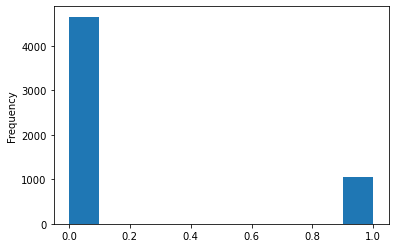

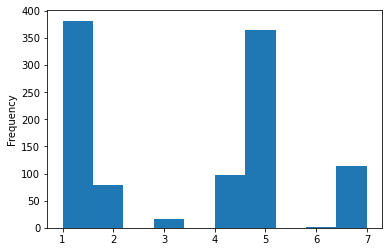

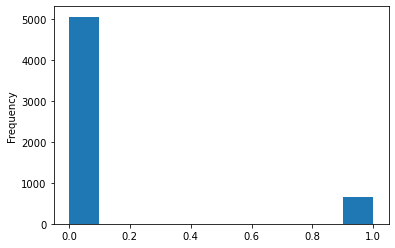

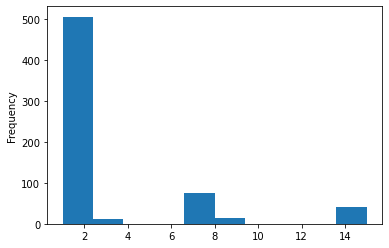

In [8]:
from matplotlib import pyplot as plt

plt.figure()
Y['Deathevent'].plot.hist()

plt.figure()
Y[Y['Deathevent']==1]["Causeofdeath"].plot.hist()

plt.figure()
Y['TechniqueFailureevent'].plot.hist()

plt.figure()
Y[Y['TechniqueFailureevent']==1]["Causeofdropout"].plot.hist()

# Predicting binary outcomes use 6-month average time-series data (using XGBoost):

* Deathevent   
* TechniqueFailureevent

X shape before feature selection:  (5707, 277)
X shape after feature selection:  (5707, 32)


Features [ 12  13  68  81  94 120 146 159 172 185 198 211 224 237 250 263 276] are constant.
invalid value encountered in true_divide


F1 score: 0.2711864406779661, Recall: 0.18867924528301888, Precision: 0.4819277108433735
F1 score: 0.24372759856630824, Recall: 0.16037735849056603, Precision: 0.5074626865671642
F1 score: 0.2576271186440678, Recall: 0.18009478672985782, Precision: 0.4523809523809524
F1 score: 0.3122923588039867, Recall: 0.22274881516587677, Precision: 0.5222222222222223
F1 score: 0.26755852842809363, Recall: 0.1895734597156398, Precision: 0.45454545454545453
Target: Deathevent, mean accuracy: 0.8123353251134671,
           mean F1 score: 0.2704784090240845, mean Recall: 0.18829473307699185, mean Precision: 0.4837078053118334


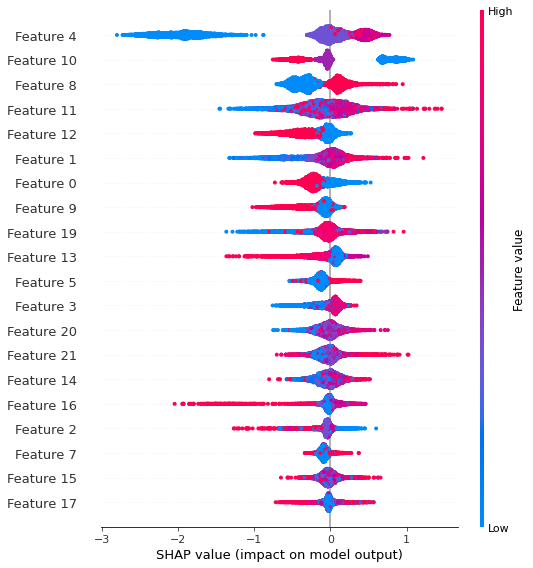

X shape before feature selection:  (5707, 277)
X shape after feature selection:  (5707, 32)


Features [ 12  13  68  81  94 120 146 159 172 185 198 211 224 237 250 263 276] are constant.
invalid value encountered in true_divide


F1 score: 0.01360544217687075, Recall: 0.007692307692307693, Precision: 0.058823529411764705
F1 score: 0.056737588652482275, Recall: 0.03076923076923077, Precision: 0.36363636363636365
F1 score: 0.014184397163120567, Recall: 0.007751937984496124, Precision: 0.08333333333333333
F1 score: 0.027972027972027972, Recall: 0.015503875968992248, Precision: 0.14285714285714285
F1 score: 0.0, Recall: 0.0, Precision: 0.0
Target: TechniqueFailureevent, mean accuracy: 0.8785702774013023,
           mean F1 score: 0.02249989119290031, mean Recall: 0.012343470483005367, mean Precision: 0.1297300738477209


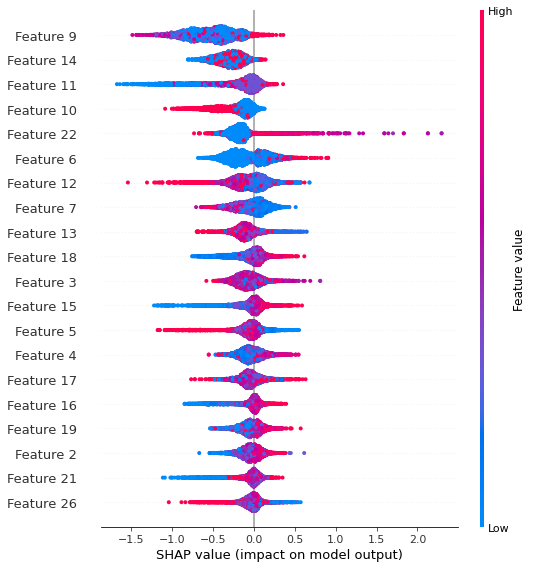

In [8]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["Deathevent","TechniqueFailureevent"]

models = []

for target in targets:
    # full dataset
    y = Y[target].copy()
    X = df_totalaverage.copy()
    print("X shape before feature selection: ", X.shape)
    
    # apply feature selection on data
    # remove constant columns
#     constant_indices = [12, 13, 68, 81, 94, 120, 146, 159, 172, 185, 198, 211, 224, 237, 250, 263, 276]
#     constant_indices.reverse()
#     for idx in constant_indices:
#         X = X.drop(X.columns[idx], axis=1)
    X = SelectKBest(f_classif, k=32).fit_transform(X, y)
    print("X shape after feature selection: ", X.shape)
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X,y):
#         X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
        
        #comment if apply feature selection
#         X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
#         X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=8,
            min_child_weight=5)
        model.fit(X_train_sm, y_train_sm)
#         model.fit(X_train, y_train)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")

        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
#     X_test = X.iloc[test_set,:]
    X_test = X[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
          mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(shap_values, X_test)


In [6]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

NameError: name 'k' is not defined

# Predicting binary outcomes use 6-month average time-series data (using neural networks):

* Deathevent   
* TechniqueFailureevent

In [17]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["Deathevent","TechniqueFailureevent"]

models = []

for target in targets:
    # full dataset
    y = Y[target].copy()
    X = df_totalaverage.copy()
    print("X shape before feature selection: ", X.shape)
    
    # apply feature selection on data
    # remove constant columns
    constant_indices = [12, 13, 68, 81, 94, 120, 146, 159, 172, 185, 198, 211, 224, 237, 250, 263, 276]
    constant_indices.reverse()
    for idx in constant_indices:
        X = X.drop(X.columns[idx], axis=1)
    X = SelectKBest(f_classif, k=32).fit_transform(X, y)
    print("X shape after feature selection: ", X.shape)
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X,y):
#         X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
        
#         X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
#         X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
#             keras.layers.Dense(units=8, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])
        
        history = model.fit(
            X_train_sm,
            y_train_sm,
            epochs=100
        )
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
        print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

X shape before feature selection:  (5707, 277)
X shape after feature selection:  (5707, 32)
Epoch 1/100
233/233 [==============================] - 0s 895us/step - loss: 4.9069 - accuracy: 0.5345
Epoch 2/100
233/233 [==============================] - 0s 778us/step - loss: 1.0152 - accuracy: 0.5823
Epoch 3/100
233/233 [==============================] - 0s 797us/step - loss: 0.7911 - accuracy: 0.5997
Epoch 4/100
233/233 [==============================] - 0s 823us/step - loss: 0.7268 - accuracy: 0.6151
Epoch 5/100
233/233 [==============================] - 0s 796us/step - loss: 0.7053 - accuracy: 0.6327
Epoch 6/100
233/233 [==============================] - 0s 810us/step - loss: 0.6925 - accuracy: 0.6321
Epoch 7/100
233/233 [==============================] - 0s 761us/step - loss: 0.6703 - accuracy: 0.6415
Epoch 8/100
233/233 [==============================] - 0s 777us/step - loss: 0.6469 - accuracy: 0.6478
Epoch 9/100
233/233 [==============================] - 0s 764us/step - loss: 0.6430 

Epoch 57/100
233/233 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.7137
Epoch 58/100
233/233 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.7075
Epoch 59/100
233/233 [==============================] - 0s 1ms/step - loss: 0.5568 - accuracy: 0.7075
Epoch 60/100
233/233 [==============================] - 0s 861us/step - loss: 0.5554 - accuracy: 0.7152
Epoch 61/100
233/233 [==============================] - 0s 963us/step - loss: 0.5560 - accuracy: 0.7113
Epoch 62/100
233/233 [==============================] - 0s 1ms/step - loss: 0.5505 - accuracy: 0.7108
Epoch 63/100
233/233 [==============================] - 0s 933us/step - loss: 0.5714 - accuracy: 0.7024
Epoch 64/100
233/233 [==============================] - 0s 815us/step - loss: 0.5555 - accuracy: 0.7177
Epoch 65/100
233/233 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.7106
Epoch 66/100
233/233 [==============================] - 0s 1ms/step - loss

233/233 [==============================] - 0s 1ms/step - loss: 0.6231 - accuracy: 0.6735
Epoch 14/100
233/233 [==============================] - 0s 1ms/step - loss: 0.6088 - accuracy: 0.6800
Epoch 15/100
233/233 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.6765
Epoch 16/100
233/233 [==============================] - 0s 1ms/step - loss: 0.6010 - accuracy: 0.6907
Epoch 17/100
233/233 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.6778
Epoch 18/100
233/233 [==============================] - 0s 1ms/step - loss: 0.6015 - accuracy: 0.6899
Epoch 19/100
233/233 [==============================] - 0s 1ms/step - loss: 0.5903 - accuracy: 0.6887
Epoch 20/100
233/233 [==============================] - 0s 850us/step - loss: 0.5936 - accuracy: 0.6864
Epoch 21/100
233/233 [==============================] - 0s 1ms/step - loss: 0.5840 - accuracy: 0.6902
Epoch 22/100
233/233 [==============================] - 0s 1ms/step - loss: 0.5944 - accuracy

233/233 [==============================] - 0s 803us/step - loss: 0.5694 - accuracy: 0.6988
Epoch 71/100
233/233 [==============================] - 0s 834us/step - loss: 0.5626 - accuracy: 0.7046
Epoch 72/100
233/233 [==============================] - 0s 784us/step - loss: 0.5596 - accuracy: 0.7137
Epoch 73/100
233/233 [==============================] - 0s 732us/step - loss: 0.5536 - accuracy: 0.7105
Epoch 74/100
233/233 [==============================] - 0s 746us/step - loss: 0.5536 - accuracy: 0.7116
Epoch 75/100
233/233 [==============================] - 0s 740us/step - loss: 0.5489 - accuracy: 0.7172
Epoch 76/100
233/233 [==============================] - 0s 759us/step - loss: 0.5474 - accuracy: 0.7198
Epoch 77/100
233/233 [==============================] - 0s 737us/step - loss: 0.5333 - accuracy: 0.7289
Epoch 78/100
233/233 [==============================] - 0s 807us/step - loss: 0.5394 - accuracy: 0.7196
Epoch 79/100
233/233 [==============================] - 0s 733us/step - loss:

Epoch 23/100
253/253 [==============================] - 0s 761us/step - loss: 0.6448 - accuracy: 0.6345
Epoch 24/100
253/253 [==============================] - 0s 741us/step - loss: 0.6393 - accuracy: 0.6357
Epoch 25/100
253/253 [==============================] - 0s 1ms/step - loss: 0.6378 - accuracy: 0.6330
Epoch 26/100
253/253 [==============================] - 0s 889us/step - loss: 0.6261 - accuracy: 0.6438
Epoch 27/100
253/253 [==============================] - 0s 830us/step - loss: 0.6285 - accuracy: 0.6378
Epoch 28/100
253/253 [==============================] - 0s 768us/step - loss: 0.6663 - accuracy: 0.6281
Epoch 29/100
253/253 [==============================] - 0s 736us/step - loss: 0.6494 - accuracy: 0.6276
Epoch 30/100
253/253 [==============================] - 0s 753us/step - loss: 0.6403 - accuracy: 0.6286
Epoch 31/100
253/253 [==============================] - 0s 770us/step - loss: 0.6450 - accuracy: 0.6392
Epoch 32/100
253/253 [==============================] - 0s 799us/s

Epoch 1/100
253/253 [==============================] - 0s 639us/step - loss: 7.9288 - accuracy: 0.5083
Epoch 2/100
253/253 [==============================] - 0s 711us/step - loss: 1.8380 - accuracy: 0.5263
Epoch 3/100
253/253 [==============================] - 0s 720us/step - loss: 1.2196 - accuracy: 0.5416
Epoch 4/100
253/253 [==============================] - 0s 713us/step - loss: 1.0216 - accuracy: 0.5493
Epoch 5/100
253/253 [==============================] - 0s 686us/step - loss: 0.9375 - accuracy: 0.5546
Epoch 6/100
253/253 [==============================] - 0s 689us/step - loss: 0.8855 - accuracy: 0.5574
Epoch 7/100
253/253 [==============================] - 0s 698us/step - loss: 0.8980 - accuracy: 0.5588
Epoch 8/100
253/253 [==============================] - 0s 664us/step - loss: 0.8888 - accuracy: 0.5579
Epoch 9/100
253/253 [==============================] - 0s 695us/step - loss: 0.8535 - accuracy: 0.5705
Epoch 10/100
253/253 [==============================] - 0s 679us/step - l

253/253 [==============================] - 0s 722us/step - loss: 0.6618 - accuracy: 0.6164
Epoch 58/100
253/253 [==============================] - 0s 876us/step - loss: 0.6520 - accuracy: 0.6202
Epoch 59/100
253/253 [==============================] - 0s 1ms/step - loss: 0.6523 - accuracy: 0.6238
Epoch 60/100
253/253 [==============================] - 0s 923us/step - loss: 0.6557 - accuracy: 0.6201
Epoch 61/100
253/253 [==============================] - 0s 896us/step - loss: 0.6429 - accuracy: 0.6255
Epoch 62/100
253/253 [==============================] - 0s 844us/step - loss: 0.6561 - accuracy: 0.6285
Epoch 63/100
253/253 [==============================] - 0s 818us/step - loss: 0.6519 - accuracy: 0.6173
Epoch 64/100
253/253 [==============================] - 0s 769us/step - loss: 0.6569 - accuracy: 0.6201
Epoch 65/100
253/253 [==============================] - 0s 810us/step - loss: 0.6484 - accuracy: 0.6188
Epoch 66/100
253/253 [==============================] - 0s 932us/step - loss: 0

Epoch 35/100
253/253 [==============================] - 0s 723us/step - loss: 0.6307 - accuracy: 0.6229
Epoch 36/100
253/253 [==============================] - 0s 742us/step - loss: 0.6476 - accuracy: 0.6224
Epoch 37/100
253/253 [==============================] - 0s 667us/step - loss: 0.6460 - accuracy: 0.6191
Epoch 38/100
253/253 [==============================] - 0s 725us/step - loss: 0.6465 - accuracy: 0.6217
Epoch 39/100
253/253 [==============================] - 0s 691us/step - loss: 0.6413 - accuracy: 0.6151
Epoch 40/100
253/253 [==============================] - 0s 655us/step - loss: 0.6341 - accuracy: 0.6248
Epoch 41/100
253/253 [==============================] - 0s 698us/step - loss: 0.6387 - accuracy: 0.6245
Epoch 42/100
253/253 [==============================] - 0s 681us/step - loss: 0.6303 - accuracy: 0.6264
Epoch 43/100
253/253 [==============================] - 0s 710us/step - loss: 0.6296 - accuracy: 0.6325
Epoch 44/100
253/253 [==============================] - 0s 685us

In [ ]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

# Federated Learning for prediction

* Deathevent   
* TechniqueFailureevent

In [ ]:
import tensorflow as tf
import tensorflow_federated as tff

# Predicting multiclass outcomes (using XGBoost):

* Causeofdeath   
* Causeofdropout

The least populated class in y has only 2 members, which is less than n_splits=5.


Target: Causeofdeath, mean accuracy: 0.38603237056246087,
         mean F1 score: 0.38603237056246087, mean Recall: 0.38603237056246087, mean Precision: 0.38603237056246087


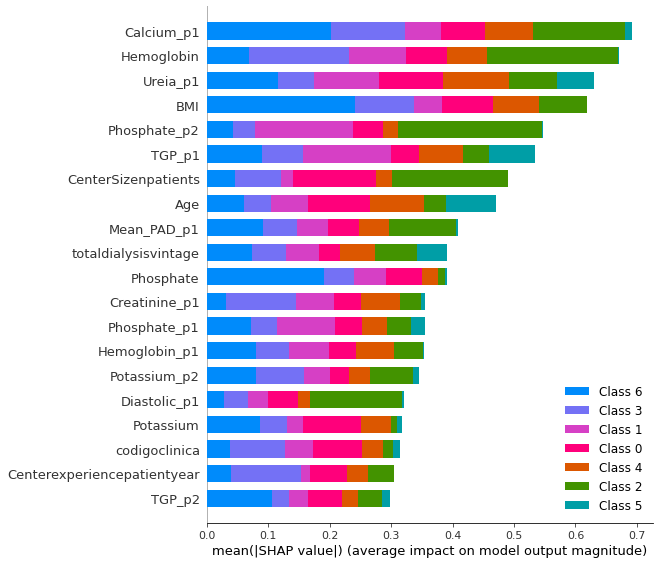

Target: Causeofdropout, mean accuracy: 0.5361350760478619,
         mean F1 score: 0.5361350760478619, mean Recall: 0.5361350760478619, mean Precision: 0.5361350760478619


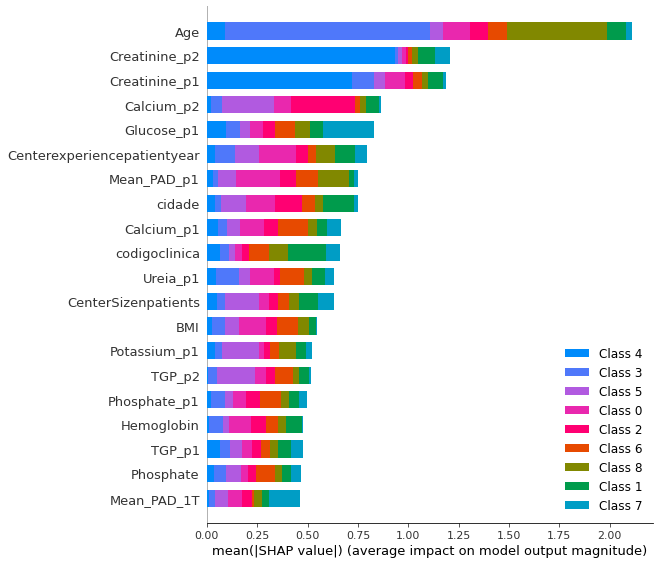

In [19]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

models = []

for target in targets:
    indicator = indicators[target]
    y = Y[Y[indicator]==1][target].copy()
    X = df_totalaverage[Y[indicator]==1].copy()
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=9,
            min_child_weight=4)
        model.fit(X_train, y_train)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_multiclass_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred, average='micro')
        recall = recall_score(y_test, y_pred, average='micro')
        precision = precision_score(y_test, y_pred, average='micro')
#         print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
#         print(f"F1 score: {f1score}")
#         shap.summary_plot(shap_values, X_test)
#         shap_values = np.array(shap_values)
#         print(shap_values.shape)
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=1)
    new_shap_values = list()
    for i in range(shap_values.shape[0]):
        new_shap_values.append(shap_values[i])
    
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(new_shap_values, X_test)


In [20]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_multiclass_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

Target: Causeofdeath, Class: 1.0, mean accuracy: 0.595131002414379,mean F1 score: 0.3628234047530946,
             mean Recall: 0.3213559969442322, mean Precision: 0.4259395659863223


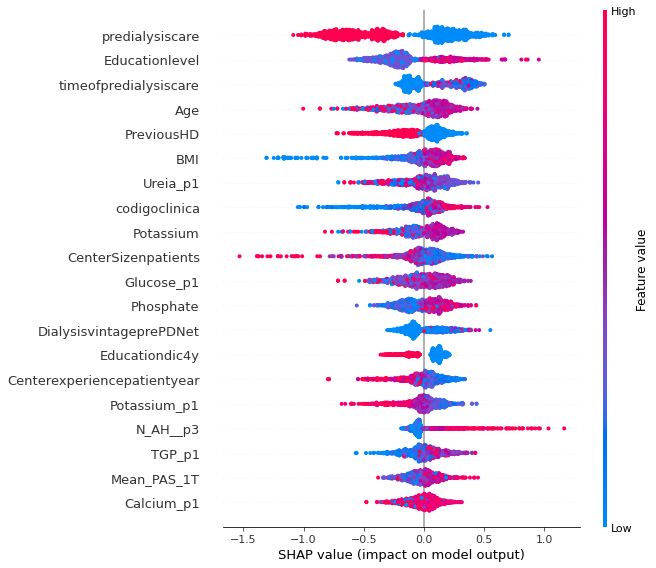

Target: Causeofdeath, Class: 2.0, mean accuracy: 0.9082133595636233,mean F1 score: 0.02,
             mean Recall: 0.014285714285714285, mean Precision: 0.03333333333333333


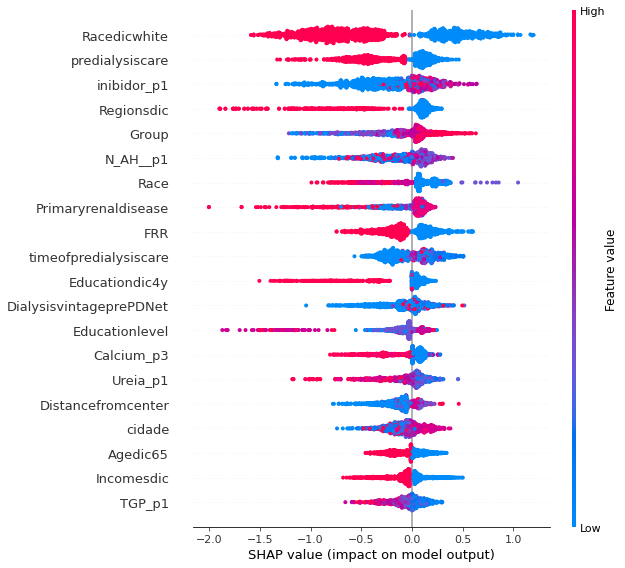

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdeath, Class: 3.0, mean accuracy: 0.9820307609764821,mean F1 score: 0.0,
             mean Recall: 0.0, mean Precision: 0.0


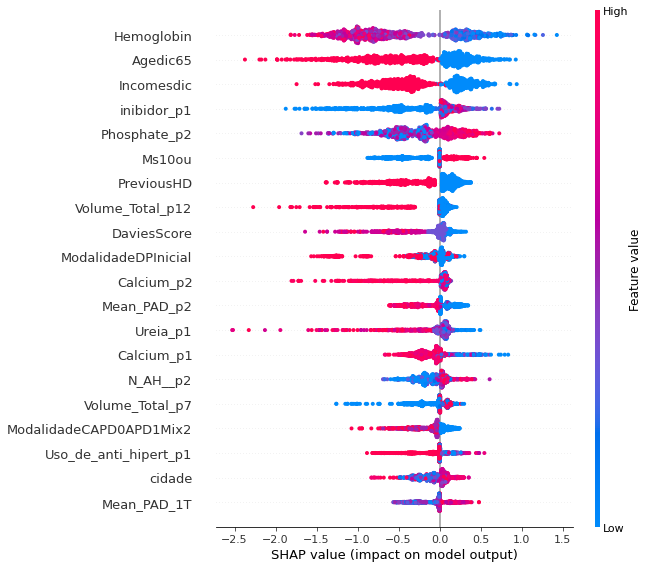

Target: Causeofdeath, Class: 4.0, mean accuracy: 0.8874094607886971,mean F1 score: 0.015384615384615382,
             mean Recall: 0.01, mean Precision: 0.03333333333333333


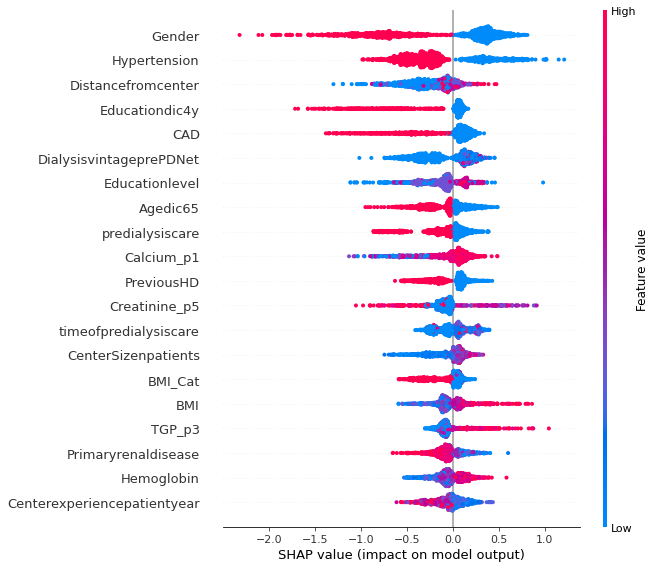

Target: Causeofdeath, Class: 5.0, mean accuracy: 0.5941339533220067,mean F1 score: 0.29567265207031423,
             mean Recall: 0.2477962285392626, mean Precision: 0.36853349031920457


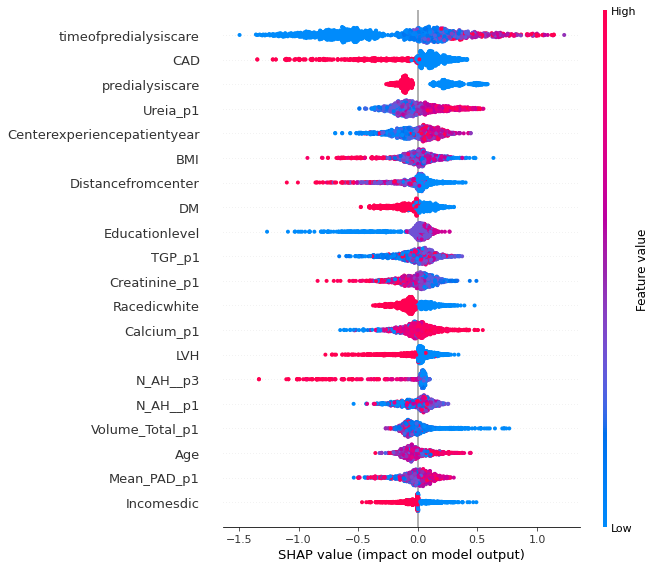

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdeath, Class: 6.0, mean accuracy: 0.9981087364750068,mean F1 score: 0.0,
             mean Recall: 0.0, mean Precision: 0.0


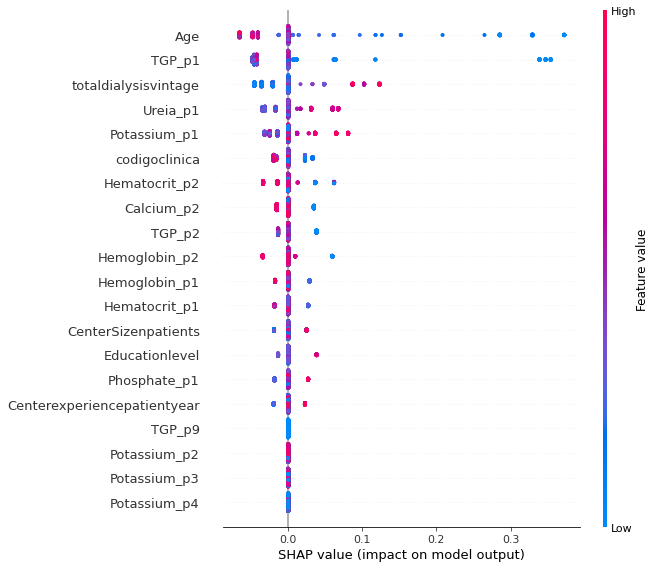

Target: Causeofdeath, Class: 7.0, mean accuracy: 0.8741750871859072,mean F1 score: 0.13402695975751006,
             mean Recall: 0.09177926421404684, mean Precision: 0.2545454545454545


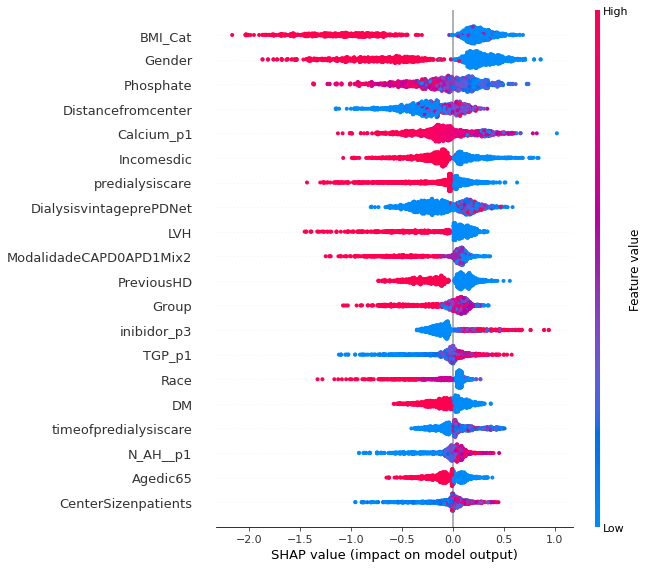

Target: Causeofdropout, Class: 1, mean accuracy: 0.9378911116857471,mean F1 score: 0.09142818620015505,
             mean Recall: 0.060144927536231886, mean Precision: 0.19714285714285715


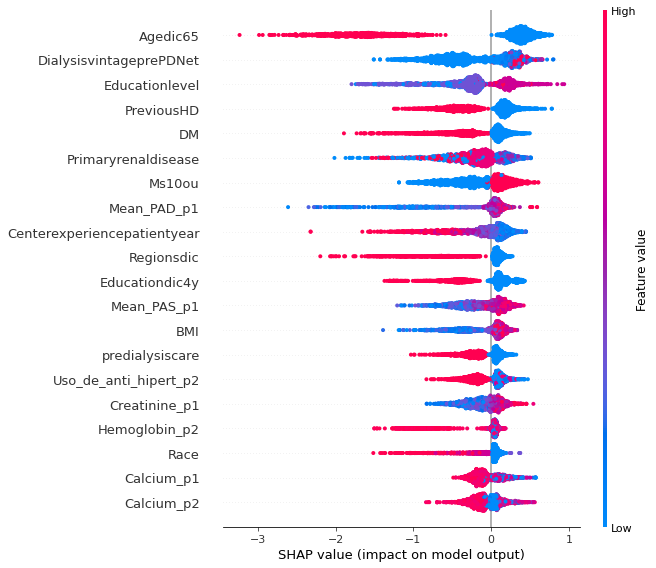

Target: Causeofdropout, Class: 2, mean accuracy: 0.7957474317684948,mean F1 score: 0.1740920154416056,
             mean Recall: 0.11327193932827737, mean Precision: 0.38059542796384893


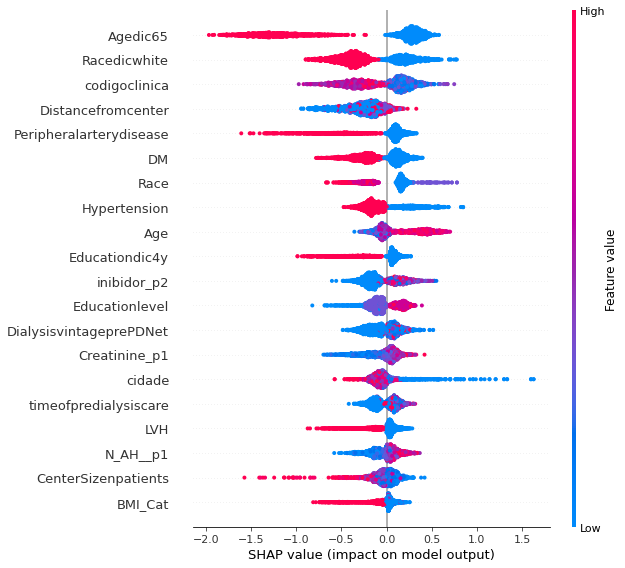

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdropout, Class: 3, mean accuracy: 0.9403300500716989,mean F1 score: 0.03076923076923077,
             mean Recall: 0.01633333333333333, mean Precision: 0.3


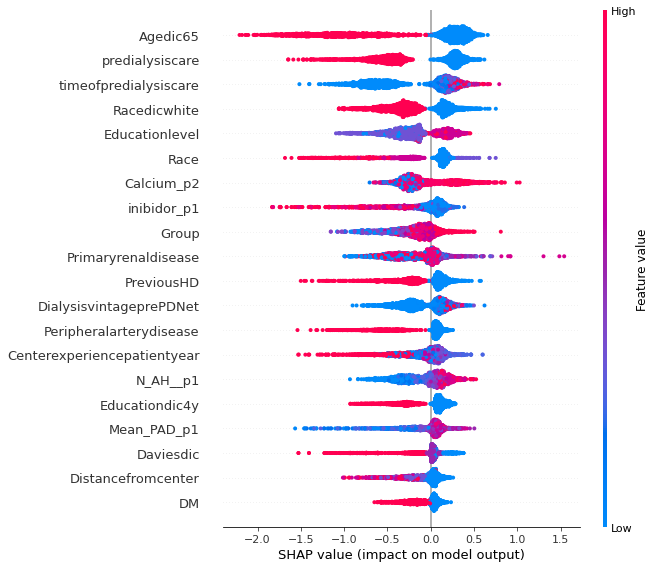

Target: Causeofdropout, Class: 4, mean accuracy: 0.933040268929688,mean F1 score: 0.2497987616099071,
             mean Recall: 0.19686507805564069, mean Precision: 0.3433075696233591


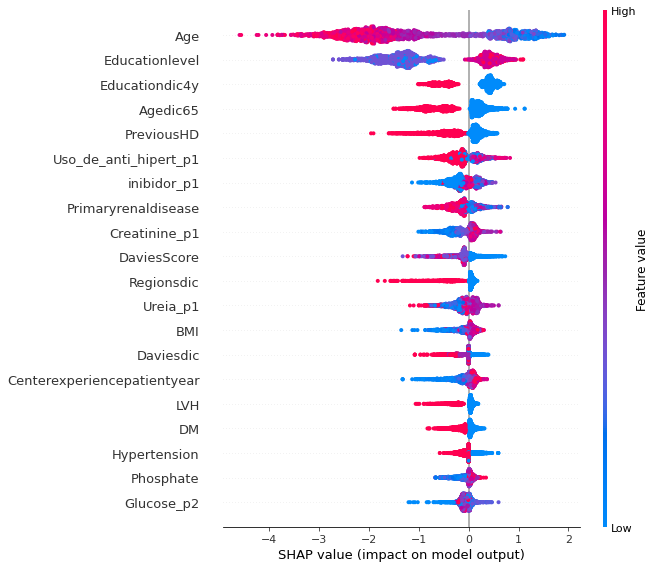

Target: Causeofdropout, Class: 5, mean accuracy: 0.9616692917087848,mean F1 score: 0.22203123673711905,
             mean Recall: 0.16515037593984963, mean Precision: 0.4440476190476191


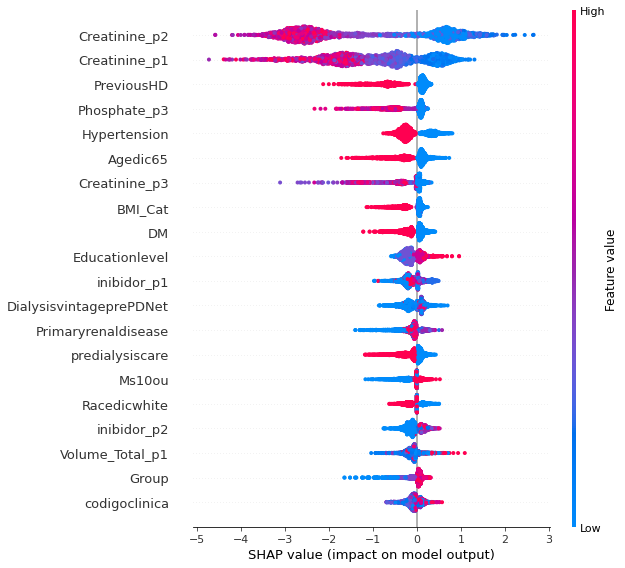

Target: Causeofdropout, Class: 6, mean accuracy: 0.9480817602670492,mean F1 score: 0.17910008271298591,
             mean Recall: 0.12031746031746031, mean Precision: 0.3666666666666667


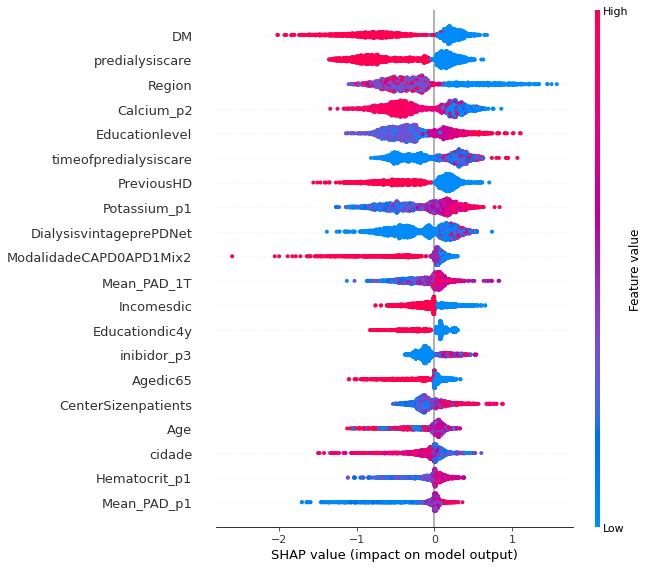

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdropout, Class: 7, mean accuracy: 0.9621606055619549,mean F1 score: 0.026666666666666665,
             mean Recall: 0.014285714285714285, mean Precision: 0.2


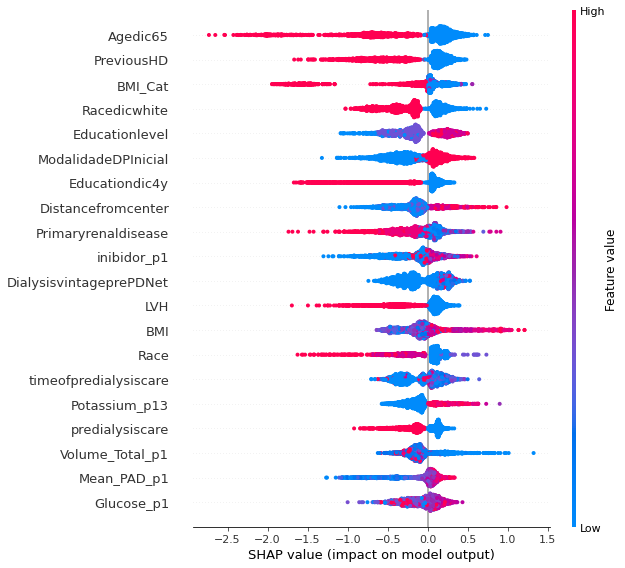

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdropout, Class: 8, mean accuracy: 0.9907802252051059,mean F1 score: 0.0,
             mean Recall: 0.0, mean Precision: 0.0


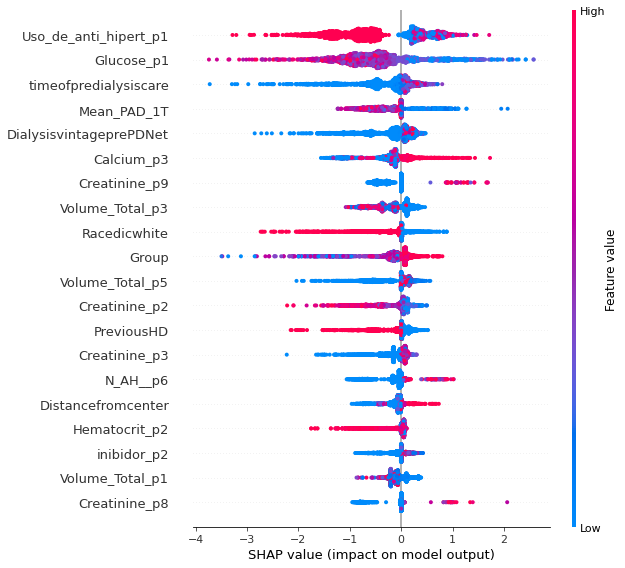

Target: Causeofdropout, Class: 10, mean accuracy: 0.66811631679165,mean F1 score: 0.6804509217495102,
             mean Recall: 0.6896865500754957, mean Precision: 0.67227830456295


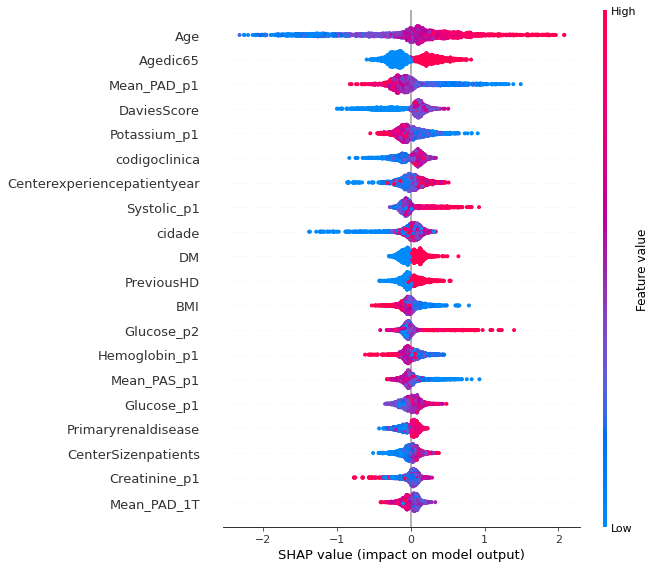

In [28]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

models = []
classnumlist = []

for target in targets:
    indicator = indicators[target]
    y = Y[Y[indicator]==1][target].copy()
    X = df_totalaverage[Y[indicator]==1].copy()
    
    set1 = set(y)
    classnumlist.append(set1)
    
    for classidx in set1:
        # Create binary classification labels
        y = np.array(y)
        ybi = np.zeros(y.shape)
        for i in range(len(y)):
            if y[i] == classidx:
                ybi[i] = 1
            else:
                ybi[i] = -1
        
        # apply k-fold cross validation
        k = 5
        kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

        list_shap_values = list()
        list_test_sets = list()
        list_normalised_accuracy = list()
        list_f1_score = list()
        list_recall = list()
        list_precision = list()
        
        j = 0

        for train_index, test_index in kf.split(X, ybi):
            X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
            y_train, y_test = ybi[train_index], ybi[test_index]
            X_train = pd.DataFrame(X_train,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)
            
            if ybi[np.where(ybi == 1)].shape[0] >= 3:

                sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
                X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

                X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
                X_test = pd.DataFrame(X_test,columns=X.columns)

                # train XGBoost model
                model = xgboost.XGBClassifier(
                    learning_rate =0.1,
                    max_depth=9,
                    min_child_weight=4)
                model.fit(X_train_sm, y_train_sm)
            
            else:
                model = xgboost.XGBClassifier(
                    learning_rate =0.1,
                    max_depth=9,
                    min_child_weight=4)
                model.fit(X_train, y_train)

            # use saved model
#             filename = 'models/' + target + '_class' + str(classidx) + '_fold'+ str(j) + '_binary_model.pkl'
#             j = j + 1
#             model = pickle.load(open(filename, 'rb'))


            # explaining model
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test)
            y_pred = model.predict(X_test)
            normalised_accuracy = accuracy_score(y_test, y_pred)
            f1score = f1_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
#             print(f"F1 score: {f1score}")
#             shap.summary_plot(shap_values, X_test)
#             print(shap_values.shape)

            # for each iteration we save the test_set index and the shap_values
            list_shap_values.append(shap_values)
            list_test_sets.append(test_index)
            list_normalised_accuracy.append(normalised_accuracy)
            list_f1_score.append(f1score)
            list_recall.append(recall)
            list_precision.append(precision)
            models.append(model)

        #combining results from all iterations
        test_set = list_test_sets[0]
        shap_values = np.array(list_shap_values[0])
        for i in range(0,len(list_test_sets)):
            test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
            shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)

        #bringing back variable names    
        X_test = X.iloc[test_set,:]

        mean_normalised_accuracy = np.mean(list_normalised_accuracy)
        mean_f1_score = np.mean(list_f1_score)
        mean_recall = np.mean(list_recall)
        mean_precision = np.mean(list_precision)
        
        print(f"Target: {target}, Class: {classidx}, mean accuracy: {mean_normalised_accuracy},mean F1 score: {mean_f1_score},\n \
            mean Recall: {mean_recall}, mean Precision: {mean_precision}")

        shap.summary_plot(shap_values, X_test)

In [29]:
# Save predictive models
import pickle

i = 0
j = 0
model = None
for target in targets:
    classnum = classnumlist[i]
    for classidx in classnum:
        for ik in range(k):         
            filename = 'models/' + target + '_class' + str(classidx) + '_fold' + str(ik) + '_binary_model.pkl'
            model = models[j]
            with open(filename, 'wb') as file:  
                pickle.dump(model, file)
            j = j + 1
    i = i + 1

# Predicting multiclass outcomes (using neural networks):

* Causeofdeath   
* Causeofdropout

In [37]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

models = []
classnumlist = []

for target in targets:
    indicator = indicators[target]
    y = Y[Y[indicator]==1][target].copy()
    X = df_totalaverage[Y[indicator]==1].copy()
    
    set1 = set(y)
    classnumlist.append(set1)
    
    for classidx in set1:
        # Create binary classification labels
        y = np.array(y)
        ybi = np.zeros(y.shape)
        for i in range(len(y)):
            if y[i] == classidx:
                ybi[i] = 1
            else:
                ybi[i] = 0
        
        # apply k-fold cross validation
        k = 5
        kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

        list_shap_values = list()
        list_test_sets = list()
        list_normalised_accuracy = list()
        list_f1_score = list()
        list_recall = list()
        list_precision = list()
        
        j = 0

        for train_index, test_index in kf.split(X, ybi):
            X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
            y_train, y_test = ybi[train_index], ybi[test_index]
            X_train = pd.DataFrame(X_train,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)
            
            if ybi[np.where(ybi == 1)].shape[0] >= 3:

                sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
                X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

                X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
                X_test = pd.DataFrame(X_test,columns=X.columns)

                model = keras.Sequential([
                        keras.layers.Dense(units=32, activation='relu',dtype='float64'),
                        keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
                    ])
        
                model.compile(optimizer='adam', 
                      loss=tf.losses.BinaryCrossentropy(from_logits=False),
                      metrics=['accuracy'])
                history = model.fit(
                    X_train_sm,
                    y_train_sm,
                    epochs=100,
                    verbose=0)                                    
            
            else:
                model = keras.Sequential([
                        keras.layers.Dense(units=32, activation='relu',dtype='float64'),
                        keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
                    ])
        
                model.compile(optimizer='adam', 
                      loss=tf.losses.BinaryCrossentropy(from_logits=False),
                      metrics=['accuracy'])
                history = model.fit(
                    X_train,
                    y_train,
                    epochs=100,
                    verbose=0) 

            # explaining model
            predictions = model.predict(X_test)
            y_pred = list()
            for i in range(len(predictions)):
                if predictions[i] >= 0.5:
                    y_pred.append(1)
                else:
                    y_pred.append(0)
            y_pred = np.array(y_pred)
            normalised_accuracy = accuracy_score(y_test, y_pred)
            f1score = f1_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)

            # for each iteration we save the test_set index and the shap_values
            list_normalised_accuracy.append(normalised_accuracy)
            list_f1_score.append(f1score)
            list_recall.append(recall)
            list_precision.append(precision)
            models.append(model)

        mean_normalised_accuracy = np.mean(list_normalised_accuracy)
        mean_f1_score = np.mean(list_f1_score)
        mean_recall = np.mean(list_recall)
        mean_precision = np.mean(list_precision)
        
        print(f"Target: {target}, Class: {classidx}, mean accuracy: {mean_normalised_accuracy},mean F1 score: {mean_f1_score},\n \
            mean Recall: {mean_recall}, mean Precision: {mean_precision}")

Target: Causeofdeath, Class: 1.0, mean accuracy: 0.5694894035589735,mean F1 score: 0.3740256479858698,
             mean Recall: 0.3697197539302802, mean Precision: 0.4055607763023493
Target: Causeofdeath, Class: 2.0, mean accuracy: 0.736032370562461,mean F1 score: 0.08642495670966616,
             mean Recall: 0.1625, mean Precision: 0.06215295815295815
Target: Causeofdeath, Class: 3.0, mean accuracy: 0.9261781275149781,mean F1 score: 0.04566596194503171,
             mean Recall: 0.11666666666666665, mean Precision: 0.03357142857142857
Target: Causeofdeath, Class: 4.0, mean accuracy: 0.7020030403290709,mean F1 score: 0.1532430063190991,
             mean Recall: 0.26736842105263153, mean Precision: 0.11849721706864562
Target: Causeofdeath, Class: 5.0, mean accuracy: 0.48535723866583214,mean F1 score: 0.38641637012916,
             mean Recall: 0.4958904109589041, mean Precision: 0.3318008101259579


The least populated class in y has only 2 members, which is less than n_splits=5.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdeath, Class: 6.0, mean accuracy: 0.9924304748278636,mean F1 score: 0.0,
             mean Recall: 0.0, mean Precision: 0.0
Target: Causeofdeath, Class: 7.0, mean accuracy: 0.7557855673790576,mean F1 score: 0.12784016403213885,
             mean Recall: 0.2193675889328063, mean Precision: 0.10522510897706312
Target: Causeofdropout, Class: 1, mean accuracy: 0.8117456921883448,mean F1 score: 0.14896695709961752,
             mean Recall: 0.3292490118577075, mean Precision: 0.11224486033768748
Target: Causeofdropout, Class: 2, mean accuracy: 0.6496509085780108,mean F1 score: 0.23950954361342475,
             mean Recall: 0.3215189873417722, mean Precision: 0.22865754030766178
Target: Causeofdropout, Class: 3, mean accuracy: 0.8068760431603941,mean F1 score: 0.126412574788842,
             mean Recall: 0.26366666666666666, mean Precision: 0.08842525055361955
Target: Causeofdropout, Class: 4, mean accuracy: 0.8767413432379699,mean F1 score: 0.20801472007145766,
             m

# Predicting binary outcomes for events in different years (using XGBoost):


* death_event_1y
* Followup1y
* Tech_event_1y
* death_event_2y
* Followup2y
* Tech_event_2y
* death_event_3y
* Followup3y
* Tech_event_3y

In [16]:
baseline = df[unique_cols].copy()

numofpatient = baseline.shape[0]

labelnames = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit','Volume_Total', 'N_AH_', 'Systolic', 'Diastolic',
             'PAS', 'PAD', 'Uso_de_anti_hipert', 'inibidor']

dfs = [df[unique_cols], df[unique_cols], df[unique_cols]]
maxmonths = [6, 18, 30]


for year in range(3):
    for labelname in labelnames:
        for patient_idx in range(numofpatient):
            # compute the max index of month including nonzero data
            maxmonth = maxmonths[year]
            maxname = labelname + str(maxmonth)
            temp = df.at[patient_idx, maxname]
            while temp == 0 and maxmonth >= maxmonths[year]-5:
                maxmonth = maxmonth - 1
                maxname = labelname + str(maxmonth)
                if maxmonth >= maxmonths[year]-5:
                    temp = df.at[patient_idx, maxname]

            # compute the average of 3 months
            mean_months = 0
            if maxmonth >= maxmonths[year]-3:
                for i in range(maxmonth-2, maxmonth+1):
                    name = labelname + str(i)
                    mean_months = mean_months + df.at[patient_idx, name]
                mean_months = mean_months/3
            elif maxmonth == maxmonths[year]-4:
                for i in range(maxmonth-1, maxmonth+1):
                    name = labelname + str(i)
                    mean_months = mean_months + df.at[patient_idx, name]
                mean_months = mean_months/2
            elif maxmonth == maxmonths[year]-5:
                name = labelname + str(maxmonth)
                mean_months = df.at[patient_idx, name]
            else:
                mean_months = 0
            yearname = str(year+1)+'Y'
            name = labelname + '_mean_months_' + yearname
            dfs[year].loc[patient_idx, name] = mean_months


extra_1y = ['Mean_PAS_1T', 'Mean_PAD_1T']
extra_2y = ['Mean_PAS_3T', 'Mean_PAD_3T']
extra_3y = ['Mean_PAS_5T', 'Mean_PAD_5T']
extras = [extra_1y, extra_2y, extra_3y]

for year in range(3):
    for index in extras[year]:
            dfs[year].loc[:,index] = df[index]    
    dfs[year] = dfs[year].fillna(0)
        
display(dfs[1])

/home/yitzhang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/yitzhang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/yitzhang/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy

,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,FRR,codigoclinica,ModalidadeCAPD0APD1Mix2,CenterSizenpatients,ModalidadeDPInicial,...,Volume_Total_mean_months_2Y,N_AH__mean_months_2Y,Systolic_mean_months_2Y,Diastolic_mean_months_2Y,PAS_mean_months_2Y,PAD_mean_months_2Y,Uso_de_anti_hipert_mean_months_2Y,inibidor_mean_months_2Y,Mean_PAS_3T,Mean_PAD_3T
0,12.933333,4.433333,5.300000,110.500000,70.000000,0,1,0,128,0.0,...,8000.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,14.000000,3.766667,5.933333,129.500000,77.000000,0,1,0,128,0.0,...,8000.0,0.0,135.666667,73.0,135.666667,73.0,0.0,0.0,136.000000,82.000000
2,11.833333,4.366667,6.100000,158.000000,81.000000,1,1,1,128,1.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,147.000000,80.000000
3,10.066667,4.733333,5.533333,140.000000,75.000000,1,1,0,128,0.0,...,8000.0,1.0,174.666667,84.0,174.666667,84.0,1.0,1.0,169.333333,99.000000
4,11.933333,4.033333,4.066667,103.500000,60.000000,0,1,2,128,0.0,...,8000.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,129.333333,72.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,8.400000,5.500000,4.700000,126.666667,76.666667,1,347,1,66,1.0,...,49995.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,120.000000,80.000000
5703,9.700000,4.300000,3.233333,130.000000,80.000000,1,347,1,66,1.0,...,49995.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
5704,10.466667,4.433333,4.466667,136.666667,80.000000,1,347,1,66,1.0,...,49995.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
5705,11.766667,4.533333,3.566667,126.666667,80.000000,1,347,1,66,1.0,...,49995.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


Target: death_event_1y, mean accuracy: 0.9102868562464792, mean F1 score: 0.32646733261316185,
           mean Recall: 0.24218541785646294, mean Precision: 0.5052421882089628


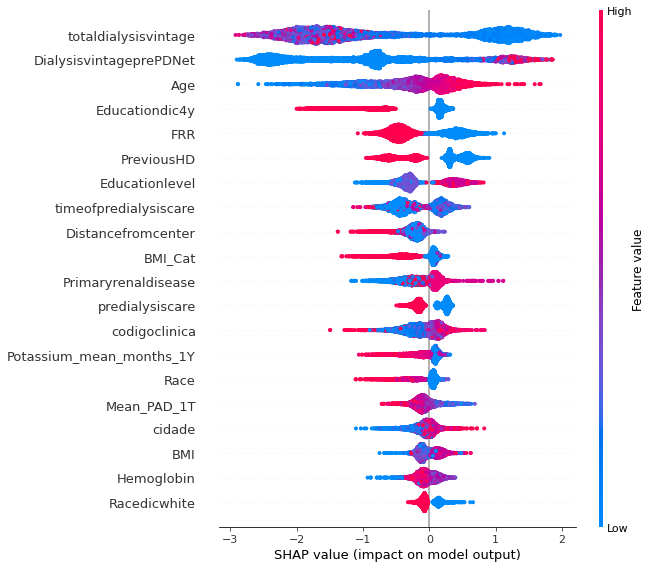

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Target: Followup1y, mean accuracy: 0.9714393156830814, mean F1 score: 0.9754522315004295,
           mean Recall: 0.9821069572814641, mean Precision: 0.9689183299959439


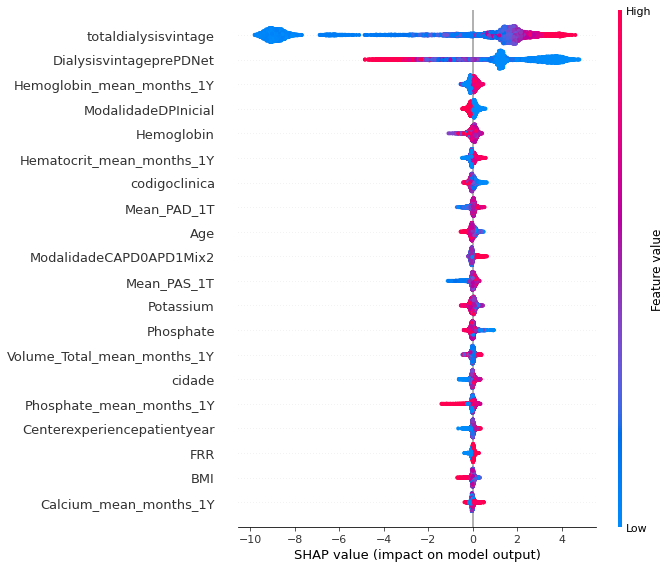

Target: Tech_event_1y, mean accuracy: 0.9432288940631854, mean F1 score: 0.04317460317460318,
           mean Recall: 0.02579124579124579, mean Precision: 0.13777777777777778


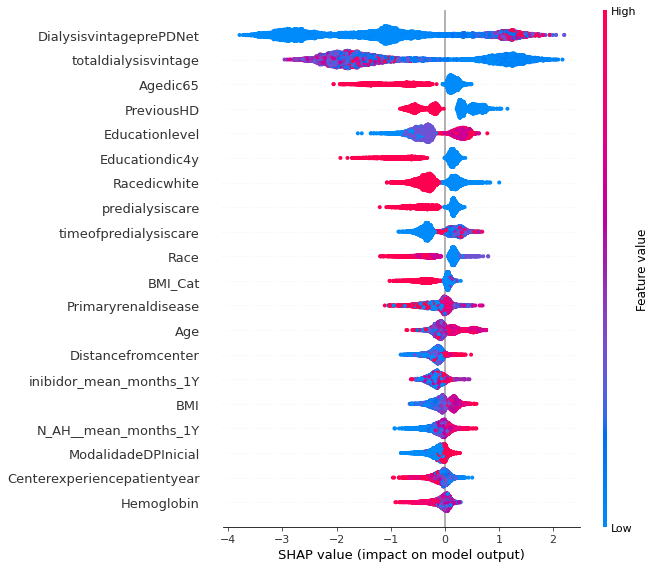

In [17]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_1y","Followup1y","Tech_event_1y"]

models = []

for target in targets:
    # full dataset
    database = dfs[0].copy()
    X = database

    if target == "Followup1y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 12:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]   
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        if target != "Followup1y":
            # apply data balancing
            sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
            X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

            #comment if apply feature selection
            X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)

            # train XGBoost model
            model = xgboost.XGBClassifier(
                learning_rate =0.1,
                max_depth=8,
                min_child_weight=3)
            model.fit(X_train_sm, y_train_sm)
        
        else:
            # train XGBoost model
            model = xgboost.XGBClassifier(
                learning_rate =0.1,
                max_depth=8,
                min_child_weight=3)
            model.fit(X_train, y_train)
            
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
#         print(f"F1 score: {f1score}")
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean F1 score: {mean_f1_score},\n \
          mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(shap_values, X_test)

In [18]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

Target: death_event_2y, mean accuracy: 0.9353224254090472, mean F1 score: 0.13423425224293917,
           mean Recall: 0.08524590163934427, mean Precision: 0.3262788192199957


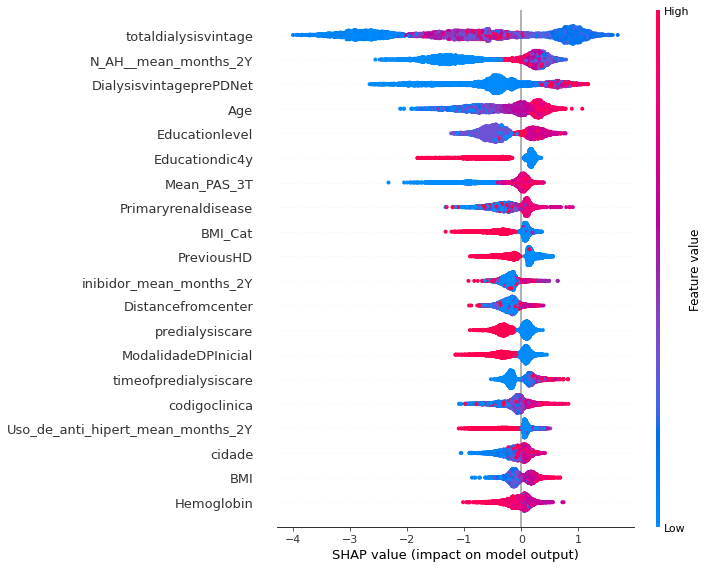

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Target: Followup2y, mean accuracy: 0.9810749166169106, mean F1 score: 0.9664201943318782,
           mean Recall: 0.9798285816320458, mean Precision: 0.9534062445009516


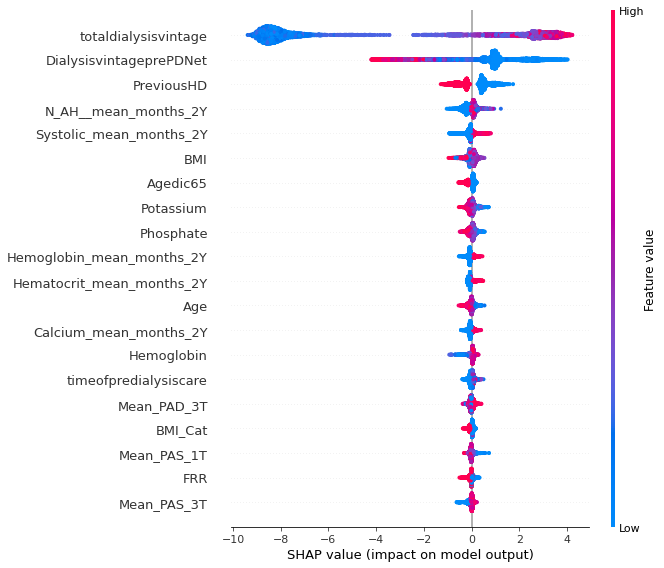

Target: Tech_event_2y, mean accuracy: 0.9578580613681531, mean F1 score: 0.06549619847939177,
           mean Recall: 0.039390243902439025, mean Precision: 0.19834054834054832


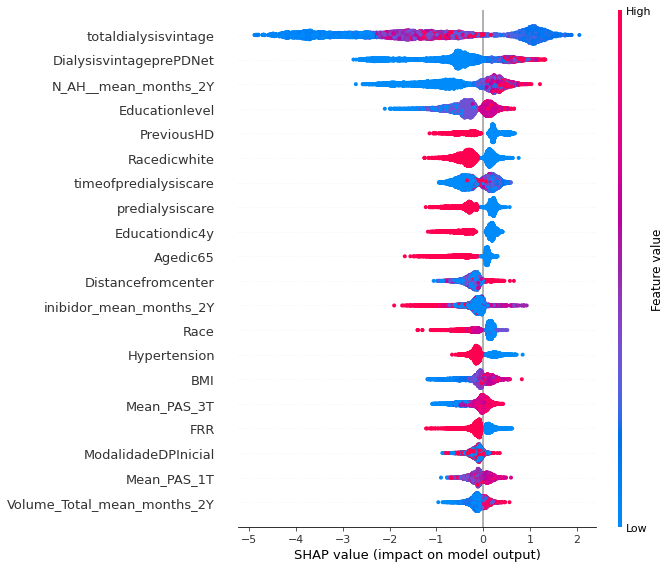

In [19]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_2y","Followup2y","Tech_event_2y"]

models = []

for target in targets:
    # full dataset
    X = dfs[1].copy()
    if target == "death_event_2y":
        indexNames = df[df["death_event_1y"] == 1].index
    elif target == "Tech_event_2y":
        indexNames = df[df["Tech_event_1y"] == 1].index
    else:
        indexNames = df[df["Followup1y"] == 0].index
    X.drop(indexNames , inplace=True) 
    
    if target == "Followup2y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 24:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True) 
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=8,
            min_child_weight=3)
        model.fit(X_train_sm, y_train_sm)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
#         print(f"F1 score: {f1score}")
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean F1 score: {mean_f1_score},\n \
          mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(shap_values, X_test)

In [20]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

Target: death_event_3y, mean accuracy: 0.9642126789366054, mean F1 score: 0.19060236707295528,
           mean Recall: 0.13698924731182796, mean Precision: 0.33835497835497835


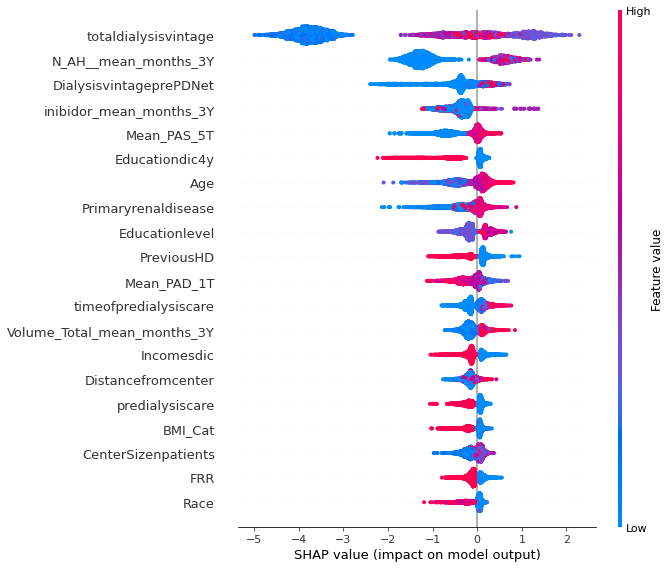

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Target: Followup3y, mean accuracy: 0.9787621281096243, mean F1 score: 0.9492293494250177,
           mean Recall: 0.9631372549019608, mean Precision: 0.9362436733417079


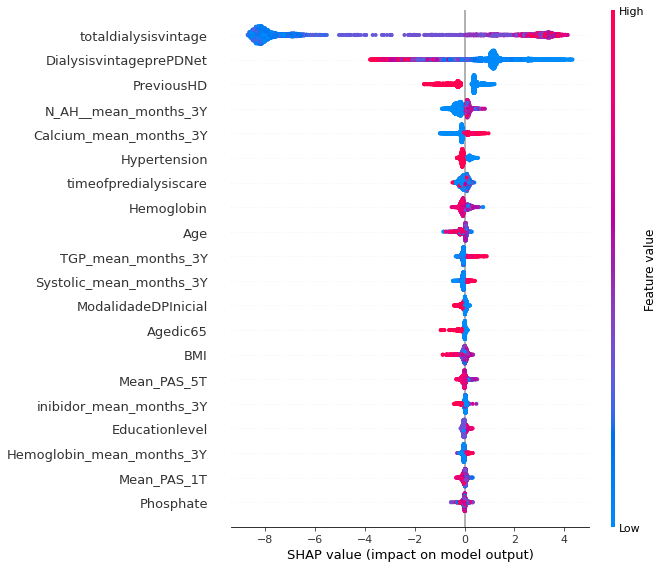

Target: Tech_event_3y, mean accuracy: 0.9780158551885474, mean F1 score: 0.06555183946488294,
           mean Recall: 0.04444444444444444, mean Precision: 0.13


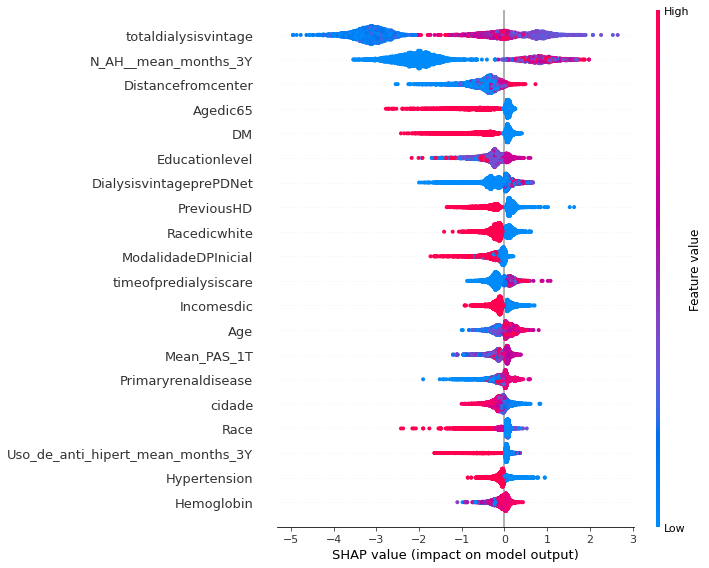

In [21]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_3y","Followup3y","Tech_event_3y"]

models = []

for target in targets:
    # full dataset
    X = dfs[2].copy()
    if target == "death_event_3y":
        indexNames = df[(df["death_event_1y"] == 1) | (df["death_event_2y"] == 1)].index
    elif target == "Tech_event_3y":
        indexNames = df[(df["Tech_event_1y"] == 1) | (df["Tech_event_2y"] == 1)].index
    else:
        indexNames = df[(df["Followup1y"] == 0) | (df["Followup2y"] - df["Followup1y"] == 0)].index
    X.drop(indexNames , inplace=True)
    
    if target == "Followup3y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 36:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True)    
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=8,
            min_child_weight=3)
        model.fit(X_train_sm, y_train_sm)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
#         print(f"F1 score: {f1score}")
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean F1 score: {mean_f1_score},\n \
          mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(shap_values, X_test)

In [22]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

# Predicting binary outcomes for events in different years (using neural networks):


* death_event_1y
* Followup1y
* Tech_event_1y
* death_event_2y
* Followup2y
* Tech_event_2y
* death_event_3y
* Followup3y
* Tech_event_3y

In [24]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["death_event_1y","Followup1y","Tech_event_1y"]

models = []

for target in targets:
    # full dataset
    X = dfs[0].copy()

    if target == "Followup1y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 12:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]   
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        if target != "Followup1y":
            # apply data balancing
            sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
            X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

            #comment if apply feature selection
            X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)          
        
        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=64, activation='relu',dtype='float64'),
#             keras.layers.Dense(units=8, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])
        
        if target != "Followup1y":
            history = model.fit(
                X_train_sm,
                y_train_sm,
                epochs=100
            )
        else:
            history = model.fit(
                X_train,
                y_train,
                epochs=100
            )
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
        print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

Epoch 1/100
260/260 [==============================] - 0s 979us/step - loss: 58.4505 - accuracy: 0.5650
Epoch 2/100
260/260 [==============================] - 0s 863us/step - loss: 9.6551 - accuracy: 0.6161
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 7.3371 - accuracy: 0.6590
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 5.7638 - accuracy: 0.7003
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 6.1580 - accuracy: 0.6932
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 6.8927 - accuracy: 0.7078
Epoch 7/100
260/260 [==============================] - 0s 1ms/step - loss: 4.0565 - accuracy: 0.7536
Epoch 8/100
260/260 [==============================] - 0s 1ms/step - loss: 5.9608 - accuracy: 0.7294
Epoch 9/100
260/260 [==============================] - 0s 1ms/step - loss: 10.3233 - accuracy: 0.6941
Epoch 10/100
260/260 [==============================] - 0s 1ms/step - loss: 7.6795 - 

260/260 [==============================] - 0s 734us/step - loss: 3.7649 - accuracy: 0.8422
Epoch 59/100
260/260 [==============================] - 0s 726us/step - loss: 3.8386 - accuracy: 0.8401
Epoch 60/100
260/260 [==============================] - 0s 683us/step - loss: 5.3748 - accuracy: 0.8256
Epoch 61/100
260/260 [==============================] - 0s 634us/step - loss: 4.3896 - accuracy: 0.8372
Epoch 62/100
260/260 [==============================] - 0s 624us/step - loss: 3.9647 - accuracy: 0.8376
Epoch 63/100
260/260 [==============================] - 0s 630us/step - loss: 4.3116 - accuracy: 0.8354
Epoch 64/100
260/260 [==============================] - 0s 830us/step - loss: 5.4878 - accuracy: 0.8231
Epoch 65/100
260/260 [==============================] - 0s 1ms/step - loss: 6.0517 - accuracy: 0.8134
Epoch 66/100
260/260 [==============================] - 0s 1ms/step - loss: 7.4783 - accuracy: 0.8058
Epoch 67/100
260/260 [==============================] - 0s 681us/step - loss: 6.4

260/260 [==============================] - 0s 811us/step - loss: 5.1107 - accuracy: 0.7582
Epoch 15/100
260/260 [==============================] - 0s 901us/step - loss: 2.9374 - accuracy: 0.7950
Epoch 16/100
260/260 [==============================] - 0s 837us/step - loss: 3.5586 - accuracy: 0.7873
Epoch 17/100
260/260 [==============================] - 0s 810us/step - loss: 4.8334 - accuracy: 0.7677
Epoch 18/100
260/260 [==============================] - 0s 881us/step - loss: 4.6330 - accuracy: 0.7735
Epoch 19/100
260/260 [==============================] - 0s 843us/step - loss: 3.6108 - accuracy: 0.7837
Epoch 20/100
260/260 [==============================] - 0s 888us/step - loss: 5.5050 - accuracy: 0.7683
Epoch 21/100
260/260 [==============================] - 0s 885us/step - loss: 5.2965 - accuracy: 0.7736
Epoch 22/100
260/260 [==============================] - 0s 860us/step - loss: 5.1568 - accuracy: 0.7794
Epoch 23/100
260/260 [==============================] - 0s 826us/step - loss:

260/260 [==============================] - 0s 775us/step - loss: 2.6605 - accuracy: 0.8447
Epoch 72/100
260/260 [==============================] - 0s 819us/step - loss: 2.4216 - accuracy: 0.8517
Epoch 73/100
260/260 [==============================] - 0s 862us/step - loss: 4.8235 - accuracy: 0.8063
Epoch 74/100
260/260 [==============================] - 0s 825us/step - loss: 3.6655 - accuracy: 0.8292
Epoch 75/100
260/260 [==============================] - 0s 804us/step - loss: 2.3860 - accuracy: 0.8503
Epoch 76/100
260/260 [==============================] - 0s 833us/step - loss: 2.1616 - accuracy: 0.8566
Epoch 77/100
260/260 [==============================] - 0s 834us/step - loss: 4.4648 - accuracy: 0.8257
Epoch 78/100
260/260 [==============================] - 0s 800us/step - loss: 3.6771 - accuracy: 0.8357
Epoch 79/100
260/260 [==============================] - 0s 798us/step - loss: 2.4613 - accuracy: 0.8518
Epoch 80/100
260/260 [==============================] - 0s 867us/step - loss:

143/143 [==============================] - 0s 964us/step - loss: 6.5682 - accuracy: 0.7834
Epoch 26/100
143/143 [==============================] - 0s 967us/step - loss: 5.7814 - accuracy: 0.8096
Epoch 27/100
143/143 [==============================] - 0s 894us/step - loss: 1.5826 - accuracy: 0.8813
Epoch 28/100
143/143 [==============================] - 0s 909us/step - loss: 4.6090 - accuracy: 0.8245
Epoch 29/100
143/143 [==============================] - 0s 919us/step - loss: 5.8731 - accuracy: 0.8068
Epoch 30/100
143/143 [==============================] - 0s 951us/step - loss: 5.6075 - accuracy: 0.8272
Epoch 31/100
143/143 [==============================] - 0s 1ms/step - loss: 3.3286 - accuracy: 0.8471
Epoch 32/100
143/143 [==============================] - 0s 1ms/step - loss: 3.0299 - accuracy: 0.8515
Epoch 33/100
143/143 [==============================] - 0s 958us/step - loss: 6.3577 - accuracy: 0.8123
Epoch 34/100
143/143 [==============================] - 0s 941us/step - loss: 3.3

143/143 [==============================] - 0s 1ms/step - loss: 7.3677 - accuracy: 0.6520
Epoch 4/100
143/143 [==============================] - 0s 914us/step - loss: 4.6940 - accuracy: 0.6857
Epoch 5/100
143/143 [==============================] - 0s 871us/step - loss: 2.8345 - accuracy: 0.7365
Epoch 6/100
143/143 [==============================] - 0s 954us/step - loss: 8.5156 - accuracy: 0.6936
Epoch 7/100
143/143 [==============================] - 0s 866us/step - loss: 4.4851 - accuracy: 0.7407
Epoch 8/100
143/143 [==============================] - 0s 931us/step - loss: 4.4414 - accuracy: 0.7554
Epoch 9/100
143/143 [==============================] - 0s 972us/step - loss: 4.8946 - accuracy: 0.7435
Epoch 10/100
143/143 [==============================] - 0s 922us/step - loss: 5.9548 - accuracy: 0.7468
Epoch 11/100
143/143 [==============================] - 0s 869us/step - loss: 6.2555 - accuracy: 0.7462
Epoch 12/100
143/143 [==============================] - 0s 905us/step - loss: 2.3497 

143/143 [==============================] - 0s 903us/step - loss: 4.6241 - accuracy: 0.8373
Epoch 61/100
143/143 [==============================] - 0s 786us/step - loss: 2.2192 - accuracy: 0.8931
Epoch 62/100
143/143 [==============================] - 0s 871us/step - loss: 5.0574 - accuracy: 0.8596
Epoch 63/100
143/143 [==============================] - 0s 792us/step - loss: 4.3027 - accuracy: 0.8537
Epoch 64/100
143/143 [==============================] - 0s 834us/step - loss: 5.9535 - accuracy: 0.8373
Epoch 65/100
143/143 [==============================] - 0s 852us/step - loss: 2.1750 - accuracy: 0.8947
Epoch 66/100
143/143 [==============================] - 0s 794us/step - loss: 1.2328 - accuracy: 0.9170
Epoch 67/100
143/143 [==============================] - 0s 875us/step - loss: 2.5568 - accuracy: 0.8947
Epoch 68/100
143/143 [==============================] - 0s 821us/step - loss: 3.3396 - accuracy: 0.8769
Epoch 69/100
143/143 [==============================] - 0s 885us/step - loss:

143/143 [==============================] - 0s 1ms/step - loss: 2.9238 - accuracy: 0.8664
Epoch 39/100
143/143 [==============================] - 0s 1ms/step - loss: 1.5359 - accuracy: 0.8999
Epoch 40/100
143/143 [==============================] - 0s 1ms/step - loss: 4.0722 - accuracy: 0.8436
Epoch 41/100
143/143 [==============================] - 0s 1ms/step - loss: 2.2722 - accuracy: 0.8730
Epoch 42/100
143/143 [==============================] - 0s 943us/step - loss: 2.2200 - accuracy: 0.8749
Epoch 43/100
143/143 [==============================] - 0s 908us/step - loss: 6.2487 - accuracy: 0.8202
Epoch 44/100
143/143 [==============================] - 0s 1ms/step - loss: 1.7901 - accuracy: 0.8918
Epoch 45/100
143/143 [==============================] - 0s 952us/step - loss: 3.1334 - accuracy: 0.8552
Epoch 46/100
143/143 [==============================] - 0s 1ms/step - loss: 4.0685 - accuracy: 0.8511
Epoch 47/100
143/143 [==============================] - 0s 1ms/step - loss: 4.1475 - accu

272/272 [==============================] - 0s 717us/step - loss: 2.3829 - accuracy: 0.8741
Epoch 94/100
272/272 [==============================] - 0s 723us/step - loss: 2.4200 - accuracy: 0.8746
Epoch 95/100
272/272 [==============================] - 0s 758us/step - loss: 2.2873 - accuracy: 0.8813
Epoch 96/100
272/272 [==============================] - 0s 718us/step - loss: 2.3152 - accuracy: 0.8759
Epoch 97/100
272/272 [==============================] - 0s 1ms/step - loss: 3.5189 - accuracy: 0.8537
Epoch 98/100
272/272 [==============================] - 0s 1ms/step - loss: 3.2356 - accuracy: 0.8651
Epoch 99/100
272/272 [==============================] - 0s 977us/step - loss: 3.0791 - accuracy: 0.8643
Epoch 100/100
272/272 [==============================] - 0s 2ms/step - loss: 3.5632 - accuracy: 0.8615
[0 0 0 ... 1 1 1]
F1 score: 0.1589958158995816, Recall: 0.6909090909090909, Precision: 0.08983451536643026
Epoch 1/100
272/272 [==============================] - 0s 837us/step - loss: 12

272/272 [==============================] - 0s 902us/step - loss: 3.2749 - accuracy: 0.8399
Epoch 49/100
272/272 [==============================] - 0s 1ms/step - loss: 3.5170 - accuracy: 0.8252
Epoch 50/100
272/272 [==============================] - 0s 1ms/step - loss: 2.5311 - accuracy: 0.8555
Epoch 51/100
272/272 [==============================] - 0s 865us/step - loss: 1.9418 - accuracy: 0.8661
Epoch 52/100
272/272 [==============================] - 0s 754us/step - loss: 3.0267 - accuracy: 0.8367
Epoch 53/100
272/272 [==============================] - 0s 747us/step - loss: 3.5782 - accuracy: 0.8300
Epoch 54/100
272/272 [==============================] - 0s 1ms/step - loss: 2.2547 - accuracy: 0.8551
Epoch 55/100
272/272 [==============================] - 0s 1ms/step - loss: 2.2391 - accuracy: 0.8559
Epoch 56/100
272/272 [==============================] - 0s 868us/step - loss: 2.4210 - accuracy: 0.8523
Epoch 57/100
272/272 [==============================] - 0s 779us/step - loss: 2.5366 

272/272 [==============================] - 0s 898us/step - loss: 10.2516 - accuracy: 0.6365
Epoch 5/100
272/272 [==============================] - 0s 1ms/step - loss: 7.7503 - accuracy: 0.6772
Epoch 6/100
272/272 [==============================] - 0s 1ms/step - loss: 4.6499 - accuracy: 0.7184
Epoch 7/100
272/272 [==============================] - 0s 1ms/step - loss: 5.9992 - accuracy: 0.7022
Epoch 8/100
272/272 [==============================] - 0s 1ms/step - loss: 4.0091 - accuracy: 0.7466
Epoch 9/100
272/272 [==============================] - 0s 1ms/step - loss: 6.1189 - accuracy: 0.7152
Epoch 10/100
272/272 [==============================] - 0s 934us/step - loss: 5.7110 - accuracy: 0.7216
Epoch 11/100
272/272 [==============================] - 0s 923us/step - loss: 5.8672 - accuracy: 0.7474
Epoch 12/100
272/272 [==============================] - 0s 993us/step - loss: 5.7358 - accuracy: 0.7434
Epoch 13/100
272/272 [==============================] - 0s 845us/step - loss: 4.3852 - accu

In [ ]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

In [25]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_2y","Followup2y","Tech_event_2y"]

models = []

for target in targets:
    # full dataset
    X = dfs[1].copy()
    if target == "death_event_2y":
        indexNames = df[df["death_event_1y"] == 1].index
    elif target == "Tech_event_2y":
        indexNames = df[df["Tech_event_1y"] == 1].index
    else:
        indexNames = df[df["Followup1y"] == 0].index
    X.drop(indexNames , inplace=True) 
    
    if target == "Followup2y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 24:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True) 
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=64, activation='relu',dtype='float64'),
#             keras.layers.Dense(units=8, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

        history = model.fit(
            X_train,
            y_train,
            epochs=100
        )
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
        print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

Epoch 1/100
130/130 [==============================] - 0s 793us/step - loss: 9.9516 - accuracy: 0.8592
Epoch 2/100
130/130 [==============================] - 0s 849us/step - loss: 10.1339 - accuracy: 0.8891
Epoch 3/100
130/130 [==============================] - 0s 881us/step - loss: 10.1009 - accuracy: 0.8968
Epoch 4/100
130/130 [==============================] - 0s 937us/step - loss: 8.7762 - accuracy: 0.8908
Epoch 5/100
130/130 [==============================] - 0s 999us/step - loss: 4.3663 - accuracy: 0.8941
Epoch 6/100
130/130 [==============================] - 0s 885us/step - loss: 9.1935 - accuracy: 0.8963
Epoch 7/100
130/130 [==============================] - 0s 918us/step - loss: 10.6150 - accuracy: 0.8905
Epoch 8/100
130/130 [==============================] - 0s 853us/step - loss: 7.5999 - accuracy: 0.8961
Epoch 9/100
130/130 [==============================] - 0s 977us/step - loss: 7.3907 - accuracy: 0.9011
Epoch 10/100
130/130 [==============================] - 0s 892us/step 

130/130 [==============================] - 0s 1ms/step - loss: 4.4880 - accuracy: 0.9078
Epoch 59/100
130/130 [==============================] - 0s 1ms/step - loss: 3.1796 - accuracy: 0.9088
Epoch 60/100
130/130 [==============================] - 0s 944us/step - loss: 5.7842 - accuracy: 0.9052
Epoch 61/100
130/130 [==============================] - 0s 920us/step - loss: 5.6699 - accuracy: 0.9086
Epoch 62/100
130/130 [==============================] - 0s 854us/step - loss: 2.8611 - accuracy: 0.9119
Epoch 63/100
130/130 [==============================] - 0s 885us/step - loss: 4.6710 - accuracy: 0.9127
Epoch 64/100
130/130 [==============================] - 0s 871us/step - loss: 3.1637 - accuracy: 0.9033
Epoch 65/100
130/130 [==============================] - 0s 932us/step - loss: 3.9317 - accuracy: 0.9122
Epoch 66/100
130/130 [==============================] - 0s 1ms/step - loss: 5.8429 - accuracy: 0.9098
Epoch 67/100
130/130 [==============================] - 0s 1ms/step - loss: 2.9216 

130/130 [==============================] - 0s 783us/step - loss: 3.7948 - accuracy: 0.9006
Epoch 15/100
130/130 [==============================] - 0s 725us/step - loss: 5.9596 - accuracy: 0.8973
Epoch 16/100
130/130 [==============================] - 0s 757us/step - loss: 3.8738 - accuracy: 0.8994
Epoch 17/100
130/130 [==============================] - 0s 721us/step - loss: 4.7635 - accuracy: 0.9021
Epoch 18/100
130/130 [==============================] - 0s 815us/step - loss: 5.2308 - accuracy: 0.9001
Epoch 19/100
130/130 [==============================] - 0s 741us/step - loss: 7.8069 - accuracy: 0.9028
Epoch 20/100
130/130 [==============================] - 0s 769us/step - loss: 5.0386 - accuracy: 0.9018
Epoch 21/100
130/130 [==============================] - 0s 679us/step - loss: 3.7841 - accuracy: 0.9009
Epoch 22/100
130/130 [==============================] - 0s 718us/step - loss: 3.9570 - accuracy: 0.9074
Epoch 23/100
130/130 [==============================] - 0s 1ms/step - loss: 4

130/130 [==============================] - 0s 873us/step - loss: 3.4308 - accuracy: 0.9093
Epoch 72/100
130/130 [==============================] - 0s 691us/step - loss: 6.0050 - accuracy: 0.9093
Epoch 73/100
130/130 [==============================] - 0s 618us/step - loss: 2.5816 - accuracy: 0.9110
Epoch 74/100
130/130 [==============================] - 0s 608us/step - loss: 6.0004 - accuracy: 0.9095
Epoch 75/100
130/130 [==============================] - 0s 642us/step - loss: 3.2934 - accuracy: 0.9151
Epoch 76/100
130/130 [==============================] - 0s 831us/step - loss: 5.5636 - accuracy: 0.9119
Epoch 77/100
130/130 [==============================] - 0s 947us/step - loss: 6.2858 - accuracy: 0.9083
Epoch 78/100
130/130 [==============================] - 0s 740us/step - loss: 5.5172 - accuracy: 0.9146
Epoch 79/100
130/130 [==============================] - 0s 743us/step - loss: 4.3373 - accuracy: 0.9057
Epoch 80/100
130/130 [==============================] - 0s 737us/step - loss:

143/143 [==============================] - 0s 759us/step - loss: 4.5719 - accuracy: 0.8738
Epoch 26/100
143/143 [==============================] - 0s 745us/step - loss: 2.7043 - accuracy: 0.8975
Epoch 27/100
143/143 [==============================] - 0s 694us/step - loss: 4.0188 - accuracy: 0.8813
Epoch 28/100
143/143 [==============================] - 0s 711us/step - loss: 4.7418 - accuracy: 0.8832
Epoch 29/100
143/143 [==============================] - 0s 761us/step - loss: 4.9158 - accuracy: 0.8773
Epoch 30/100
143/143 [==============================] - 0s 996us/step - loss: 5.2905 - accuracy: 0.8762
Epoch 31/100
143/143 [==============================] - 0s 898us/step - loss: 3.0987 - accuracy: 0.8981
Epoch 32/100
143/143 [==============================] - 0s 701us/step - loss: 3.3052 - accuracy: 0.8997
Epoch 33/100
143/143 [==============================] - 0s 700us/step - loss: 7.5932 - accuracy: 0.8637
Epoch 34/100
143/143 [==============================] - 0s 770us/step - loss:

143/143 [==============================] - 0s 779us/step - loss: 3.7131 - accuracy: 0.9185
Epoch 83/100
143/143 [==============================] - 0s 845us/step - loss: 11.0767 - accuracy: 0.8901
Epoch 84/100
143/143 [==============================] - 0s 722us/step - loss: 3.5550 - accuracy: 0.9231
Epoch 85/100
143/143 [==============================] - 0s 678us/step - loss: 4.6248 - accuracy: 0.9131
Epoch 86/100
143/143 [==============================] - 0s 696us/step - loss: 4.2536 - accuracy: 0.9117
Epoch 87/100
143/143 [==============================] - 0s 648us/step - loss: 3.3597 - accuracy: 0.9343
Epoch 88/100
143/143 [==============================] - 0s 668us/step - loss: 3.1795 - accuracy: 0.9290
Epoch 89/100
143/143 [==============================] - 0s 649us/step - loss: 4.2303 - accuracy: 0.9242
Epoch 90/100
143/143 [==============================] - 0s 983us/step - loss: 4.9057 - accuracy: 0.9141
Epoch 91/100
143/143 [==============================] - 0s 1ms/step - loss: 

143/143 [==============================] - 0s 1ms/step - loss: 3.1386 - accuracy: 0.8977
Epoch 39/100
143/143 [==============================] - 0s 1ms/step - loss: 4.0086 - accuracy: 0.8863
Epoch 40/100
143/143 [==============================] - 0s 825us/step - loss: 1.6095 - accuracy: 0.9253
Epoch 41/100
143/143 [==============================] - 0s 1ms/step - loss: 3.1702 - accuracy: 0.8931
Epoch 42/100
143/143 [==============================] - 0s 1ms/step - loss: 2.8775 - accuracy: 0.9021
Epoch 43/100
143/143 [==============================] - 0s 1ms/step - loss: 7.0476 - accuracy: 0.8664
Epoch 44/100
143/143 [==============================] - 0s 848us/step - loss: 2.8064 - accuracy: 0.8953
Epoch 45/100
143/143 [==============================] - 0s 1ms/step - loss: 2.5353 - accuracy: 0.9043
Epoch 46/100
143/143 [==============================] - 0s 1ms/step - loss: 10.1470 - accuracy: 0.8528
Epoch 47/100
143/143 [==============================] - 0s 915us/step - loss: 2.4090 - acc

Epoch 95/100
136/136 [==============================] - 0s 2ms/step - loss: 3.8073 - accuracy: 0.9381
Epoch 96/100
136/136 [==============================] - 0s 2ms/step - loss: 2.5498 - accuracy: 0.9374
Epoch 97/100
136/136 [==============================] - 0s 2ms/step - loss: 5.2758 - accuracy: 0.9397
Epoch 98/100
136/136 [==============================] - 0s 2ms/step - loss: 3.2077 - accuracy: 0.9360
Epoch 99/100
136/136 [==============================] - 0s 2ms/step - loss: 5.0427 - accuracy: 0.9372
Epoch 100/100
136/136 [==============================] - 0s 1ms/step - loss: 2.9932 - accuracy: 0.9379
[0 0 0 ... 0 0 0]
F1 score: 0.03921568627450981, Recall: 0.025, Precision: 0.09090909090909091
Epoch 1/100
136/136 [==============================] - 0s 1ms/step - loss: 5.7384 - accuracy: 0.9179
Epoch 2/100
136/136 [==============================] - 0s 1ms/step - loss: 3.9618 - accuracy: 0.9319
Epoch 3/100
136/136 [==============================] - 0s 1ms/step - loss: 9.5957 - accura

136/136 [==============================] - 0s 1ms/step - loss: 3.0529 - accuracy: 0.9335
Epoch 52/100
136/136 [==============================] - 0s 1ms/step - loss: 3.0587 - accuracy: 0.9443
Epoch 53/100
136/136 [==============================] - 0s 1ms/step - loss: 5.7548 - accuracy: 0.9360
Epoch 54/100
136/136 [==============================] - 0s 1ms/step - loss: 6.3537 - accuracy: 0.9333
Epoch 55/100
136/136 [==============================] - 0s 2ms/step - loss: 4.4746 - accuracy: 0.9411
Epoch 56/100
136/136 [==============================] - 0s 2ms/step - loss: 5.0154 - accuracy: 0.9360
Epoch 57/100
136/136 [==============================] - 0s 2ms/step - loss: 5.0425 - accuracy: 0.9379
Epoch 58/100
136/136 [==============================] - 0s 2ms/step - loss: 5.4167 - accuracy: 0.9383
Epoch 59/100
136/136 [==============================] - 0s 2ms/step - loss: 6.2479 - accuracy: 0.9402
Epoch 60/100
136/136 [==============================] - 0s 2ms/step - loss: 3.0923 - accuracy: 

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


136/136 [==============================] - 0s 848us/step - loss: 13.2761 - accuracy: 0.9241
Epoch 2/100
136/136 [==============================] - 0s 837us/step - loss: 4.6682 - accuracy: 0.9303
Epoch 3/100
136/136 [==============================] - 0s 862us/step - loss: 4.5177 - accuracy: 0.9255
Epoch 4/100
136/136 [==============================] - 0s 894us/step - loss: 8.2046 - accuracy: 0.9340
Epoch 5/100
136/136 [==============================] - 0s 951us/step - loss: 8.2995 - accuracy: 0.9299
Epoch 6/100
136/136 [==============================] - 0s 1ms/step - loss: 7.0472 - accuracy: 0.9301
Epoch 7/100
136/136 [==============================] - 0s 857us/step - loss: 5.5386 - accuracy: 0.9317
Epoch 8/100
136/136 [==============================] - 0s 914us/step - loss: 3.2734 - accuracy: 0.9333
Epoch 9/100
136/136 [==============================] - 0s 855us/step - loss: 4.6000 - accuracy: 0.9331
Epoch 10/100
136/136 [==============================] - 0s 883us/step - loss: 5.3733 -

136/136 [==============================] - 0s 1ms/step - loss: 5.0510 - accuracy: 0.9324
Epoch 82/100
136/136 [==============================] - 0s 1ms/step - loss: 3.3492 - accuracy: 0.9361
Epoch 83/100
136/136 [==============================] - 0s 991us/step - loss: 4.4399 - accuracy: 0.9342
Epoch 84/100
136/136 [==============================] - 0s 913us/step - loss: 3.9942 - accuracy: 0.9391
Epoch 85/100
136/136 [==============================] - 0s 1ms/step - loss: 2.6913 - accuracy: 0.9340
Epoch 86/100
136/136 [==============================] - 0s 1ms/step - loss: 4.8898 - accuracy: 0.9368
Epoch 87/100
136/136 [==============================] - 0s 1ms/step - loss: 4.3303 - accuracy: 0.9414
Epoch 88/100
136/136 [==============================] - 0s 1ms/step - loss: 3.6600 - accuracy: 0.9372
Epoch 89/100
136/136 [==============================] - 0s 935us/step - loss: 1.7981 - accuracy: 0.9370
Epoch 90/100
136/136 [==============================] - 0s 941us/step - loss: 4.8486 - ac

In [ ]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

In [26]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_3y","Followup3y","Tech_event_3y"]

models = []

for target in targets:
    # full dataset
    X = dfs[2].copy()
    if target == "death_event_3y":
        indexNames = df[(df["death_event_1y"] == 1) | (df["death_event_2y"] == 1)].index
    elif target == "Tech_event_3y":
        indexNames = df[(df["Tech_event_1y"] == 1) | (df["Tech_event_2y"] == 1)].index
    else:
        indexNames = df[(df["Followup1y"] == 0) | (df["Followup2y"] - df["Followup1y"] == 0)].index
    X.drop(indexNames , inplace=True)
    
    if target == "Followup3y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 36:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True)    
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=64, activation='relu',dtype='float64'),
#             keras.layers.Dense(units=8, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

        history = model.fit(
            X_train,
            y_train,
            epochs=100
        )
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
        print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

Epoch 1/100
123/123 [==============================] - 0s 2ms/step - loss: 10.8315 - accuracy: 0.9169
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 4.6344 - accuracy: 0.9394
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 5.4441 - accuracy: 0.9435
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 4.7864 - accuracy: 0.9394
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 5.5486 - accuracy: 0.9397
Epoch 6/100
123/123 [==============================] - 0s 2ms/step - loss: 6.1532 - accuracy: 0.9415
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 4.0866 - accuracy: 0.9425
Epoch 8/100
123/123 [==============================] - 0s 2ms/step - loss: 3.2043 - accuracy: 0.9407
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 3.3906 - accuracy: 0.9394
Epoch 10/100
123/123 [==============================] - 0s 1ms/step - loss: 3.5266 - accur

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


123/123 [==============================] - 0s 2ms/step - loss: 52.0693 - accuracy: 0.8497
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 2.6154 - accuracy: 0.9420
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 2.1353 - accuracy: 0.9412
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 4.0501 - accuracy: 0.9453
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 2.6401 - accuracy: 0.9399
Epoch 6/100
123/123 [==============================] - 0s 2ms/step - loss: 3.5504 - accuracy: 0.9389
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 5.3526 - accuracy: 0.9453
Epoch 8/100
123/123 [==============================] - 0s 2ms/step - loss: 3.4242 - accuracy: 0.9427
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 3.1252 - accuracy: 0.9415
Epoch 10/100
123/123 [==============================] - 0s 2ms/step - loss: 4.8764 - accuracy: 0.9438


123/123 [==============================] - 0s 1ms/step - loss: 1.7377 - accuracy: 0.9494
Epoch 82/100
123/123 [==============================] - 0s 941us/step - loss: 5.3141 - accuracy: 0.9476
Epoch 83/100
123/123 [==============================] - 0s 1ms/step - loss: 3.4972 - accuracy: 0.9448
Epoch 84/100
123/123 [==============================] - 0s 864us/step - loss: 4.6265 - accuracy: 0.9491
Epoch 85/100
123/123 [==============================] - 0s 996us/step - loss: 1.5959 - accuracy: 0.9560
Epoch 86/100
123/123 [==============================] - 0s 866us/step - loss: 1.9016 - accuracy: 0.9471
Epoch 87/100
123/123 [==============================] - 0s 826us/step - loss: 3.0331 - accuracy: 0.9537
Epoch 88/100
123/123 [==============================] - 0s 916us/step - loss: 3.4866 - accuracy: 0.9471
Epoch 89/100
123/123 [==============================] - 0s 1ms/step - loss: 2.8476 - accuracy: 0.9496
Epoch 90/100
123/123 [==============================] - 0s 898us/step - loss: 3.533

Epoch 1/100
123/123 [==============================] - 0s 756us/step - loss: 17.7320 - accuracy: 0.9353
Epoch 2/100
123/123 [==============================] - 0s 809us/step - loss: 6.2181 - accuracy: 0.9410
Epoch 3/100
123/123 [==============================] - 0s 801us/step - loss: 9.3530 - accuracy: 0.9427
Epoch 4/100
123/123 [==============================] - 0s 803us/step - loss: 6.7280 - accuracy: 0.9387
Epoch 5/100
123/123 [==============================] - 0s 806us/step - loss: 6.7191 - accuracy: 0.9433
Epoch 6/100
123/123 [==============================] - 0s 825us/step - loss: 9.7090 - accuracy: 0.9427
Epoch 7/100
123/123 [==============================] - 0s 846us/step - loss: 6.7475 - accuracy: 0.9399
Epoch 8/100
123/123 [==============================] - 0s 1ms/step - loss: 4.3627 - accuracy: 0.9387
Epoch 9/100
123/123 [==============================] - 0s 905us/step - loss: 6.7543 - accuracy: 0.9450
Epoch 10/100
123/123 [==============================] - 0s 1ms/step - loss

123/123 [==============================] - 0s 1ms/step - loss: 3.9931 - accuracy: 0.9476
Epoch 40/100
123/123 [==============================] - 0s 1ms/step - loss: 2.5843 - accuracy: 0.9471
Epoch 41/100
123/123 [==============================] - 0s 1ms/step - loss: 2.8007 - accuracy: 0.9466
Epoch 42/100
123/123 [==============================] - 0s 1ms/step - loss: 4.6460 - accuracy: 0.9476
Epoch 43/100
123/123 [==============================] - 0s 1ms/step - loss: 2.4106 - accuracy: 0.9496
Epoch 44/100
123/123 [==============================] - 0s 786us/step - loss: 2.4081 - accuracy: 0.9430
Epoch 45/100
123/123 [==============================] - 0s 808us/step - loss: 3.8355 - accuracy: 0.9440
Epoch 46/100
123/123 [==============================] - 0s 1ms/step - loss: 3.1206 - accuracy: 0.9519
Epoch 47/100
123/123 [==============================] - 0s 797us/step - loss: 3.8802 - accuracy: 0.9443
Epoch 48/100
123/123 [==============================] - 0s 814us/step - loss: 3.1553 - ac

Epoch 1/100
83/83 [==============================] - 0s 1ms/step - loss: 16.7524 - accuracy: 0.7758
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 6.3239 - accuracy: 0.8134
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 4.0966 - accuracy: 0.8259
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 7.3460 - accuracy: 0.8171
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 7.7275 - accuracy: 0.8300
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 7.5911 - accuracy: 0.8319
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 6.9414 - accuracy: 0.8274
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 10.6707 - accuracy: 0.8236
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 5.4615 - accuracy: 0.8615
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 3.5184 - accuracy: 0.8585
Epoch 1

83/83 [==============================] - 0s 1ms/step - loss: 1.1205 - accuracy: 0.9173
Epoch 50/100
83/83 [==============================] - 0s 910us/step - loss: 5.2094 - accuracy: 0.8642
Epoch 51/100
83/83 [==============================] - 0s 902us/step - loss: 2.3026 - accuracy: 0.8942
Epoch 52/100
83/83 [==============================] - 0s 937us/step - loss: 1.3284 - accuracy: 0.9166
Epoch 53/100
83/83 [==============================] - 0s 916us/step - loss: 0.7615 - accuracy: 0.9382
Epoch 54/100
83/83 [==============================] - 0s 822us/step - loss: 2.3133 - accuracy: 0.8885
Epoch 55/100
83/83 [==============================] - 0s 888us/step - loss: 2.6184 - accuracy: 0.8965
Epoch 56/100
83/83 [==============================] - 0s 813us/step - loss: 1.3666 - accuracy: 0.9135
Epoch 57/100
83/83 [==============================] - 0s 936us/step - loss: 1.8744 - accuracy: 0.9135
Epoch 58/100
83/83 [==============================] - 0s 1ms/step - loss: 2.5264 - accuracy: 0.89

83/83 [==============================] - 0s 1ms/step - loss: 3.2036 - accuracy: 0.8950
Epoch 98/100
83/83 [==============================] - 0s 976us/step - loss: 2.6779 - accuracy: 0.9158
Epoch 99/100
83/83 [==============================] - 0s 1ms/step - loss: 2.7332 - accuracy: 0.9139
Epoch 100/100
83/83 [==============================] - 0s 878us/step - loss: 1.5383 - accuracy: 0.9261
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1
 0 0 0 0

83/83 [==============================] - 0s 926us/step - loss: 2.6485 - accuracy: 0.8855
Epoch 32/100
83/83 [==============================] - 0s 994us/step - loss: 2.6588 - accuracy: 0.8836
Epoch 33/100
83/83 [==============================] - 0s 968us/step - loss: 5.2578 - accuracy: 0.8608
Epoch 34/100
83/83 [==============================] - 0s 932us/step - loss: 2.1984 - accuracy: 0.8938
Epoch 35/100
83/83 [==============================] - 0s 888us/step - loss: 3.3701 - accuracy: 0.8809
Epoch 36/100
83/83 [==============================] - 0s 915us/step - loss: 2.7556 - accuracy: 0.8855
Epoch 37/100
83/83 [==============================] - 0s 978us/step - loss: 2.9515 - accuracy: 0.8957
Epoch 38/100
83/83 [==============================] - 0s 946us/step - loss: 2.9333 - accuracy: 0.8874
Epoch 39/100
83/83 [==============================] - 0s 908us/step - loss: 8.3548 - accuracy: 0.8548
Epoch 40/100
83/83 [==============================] - 0s 865us/step - loss: 2.5132 - accuracy: 

F1 score: 0.5756929637526652, Recall: 0.9926470588235294, Precision: 0.40540540540540543
Target: Followup3y, mean accuracy: 0.8725520761484342,
         mean F1 score: 0.7241284420935223, mean Recall: 0.7778213507625273, mean Precision: 0.7781903706985674
Epoch 1/100
131/131 [==============================] - 0s 828us/step - loss: 69.9570 - accuracy: 0.9207
Epoch 2/100
131/131 [==============================] - 0s 845us/step - loss: 2.9681 - accuracy: 0.9630
Epoch 3/100
131/131 [==============================] - 0s 804us/step - loss: 1.5895 - accuracy: 0.9696
Epoch 4/100
131/131 [==============================] - 0s 873us/step - loss: 2.3305 - accuracy: 0.9673
Epoch 5/100
131/131 [==============================] - 0s 1ms/step - loss: 2.1560 - accuracy: 0.9680
Epoch 6/100
131/131 [==============================] - 0s 1ms/step - loss: 2.5054 - accuracy: 0.9696
Epoch 7/100
131/131 [==============================] - 0s 969us/step - loss: 2.1614 - accuracy: 0.9682
Epoch 8/100
131/131 [=====

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


131/131 [==============================] - 0s 1ms/step - loss: 48.2118 - accuracy: 0.9532
Epoch 2/100
131/131 [==============================] - 0s 971us/step - loss: 3.2217 - accuracy: 0.9725
Epoch 3/100
131/131 [==============================] - 0s 777us/step - loss: 1.9057 - accuracy: 0.9665
Epoch 4/100
131/131 [==============================] - 0s 723us/step - loss: 3.5045 - accuracy: 0.9668
Epoch 5/100
131/131 [==============================] - 0s 732us/step - loss: 4.3734 - accuracy: 0.9663
Epoch 6/100
131/131 [==============================] - 0s 732us/step - loss: 2.7382 - accuracy: 0.9677
Epoch 7/100
131/131 [==============================] - 0s 740us/step - loss: 5.5733 - accuracy: 0.9677
Epoch 8/100
131/131 [==============================] - 0s 974us/step - loss: 3.4537 - accuracy: 0.9663
Epoch 9/100
131/131 [==============================] - 0s 754us/step - loss: 1.5686 - accuracy: 0.9665
Epoch 10/100
131/131 [==============================] - 0s 797us/step - loss: 2.1566 -

131/131 [==============================] - 0s 1ms/step - loss: 1.7666 - accuracy: 0.9680
Epoch 59/100
131/131 [==============================] - 0s 763us/step - loss: 3.0865 - accuracy: 0.9711
Epoch 60/100
131/131 [==============================] - 0s 904us/step - loss: 3.5207 - accuracy: 0.9685
Epoch 61/100
131/131 [==============================] - 0s 778us/step - loss: 2.0168 - accuracy: 0.9718
Epoch 62/100
131/131 [==============================] - 0s 1ms/step - loss: 2.5091 - accuracy: 0.9699
Epoch 63/100
131/131 [==============================] - 0s 968us/step - loss: 1.5306 - accuracy: 0.9713
Epoch 64/100
131/131 [==============================] - 0s 994us/step - loss: 3.6852 - accuracy: 0.9723
Epoch 65/100
131/131 [==============================] - 0s 989us/step - loss: 2.6932 - accuracy: 0.9718
Epoch 66/100
131/131 [==============================] - 0s 1ms/step - loss: 2.6480 - accuracy: 0.9663
Epoch 67/100
131/131 [==============================] - 0s 1ms/step - loss: 3.7671 

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


131/131 [==============================] - 0s 1ms/step - loss: 3.1071 - accuracy: 0.9591
Epoch 2/100
131/131 [==============================] - 0s 945us/step - loss: 5.9872 - accuracy: 0.9665
Epoch 3/100
131/131 [==============================] - 0s 903us/step - loss: 3.3323 - accuracy: 0.9651
Epoch 4/100
131/131 [==============================] - 0s 858us/step - loss: 3.9169 - accuracy: 0.9665
Epoch 5/100
131/131 [==============================] - 0s 1ms/step - loss: 1.9660 - accuracy: 0.9665
Epoch 6/100
131/131 [==============================] - 0s 1ms/step - loss: 4.8795 - accuracy: 0.9699
Epoch 7/100
131/131 [==============================] - 0s 862us/step - loss: 2.8452 - accuracy: 0.9680
Epoch 8/100
131/131 [==============================] - 0s 873us/step - loss: 4.1914 - accuracy: 0.9685
Epoch 9/100
131/131 [==============================] - 0s 827us/step - loss: 2.4659 - accuracy: 0.9665
Epoch 10/100
131/131 [==============================] - 0s 1ms/step - loss: 2.5656 - accura

Epoch 81/100
131/131 [==============================] - 0s 1ms/step - loss: 1.6003 - accuracy: 0.9718
Epoch 82/100
131/131 [==============================] - 0s 926us/step - loss: 1.2704 - accuracy: 0.9720
Epoch 83/100
131/131 [==============================] - 0s 1ms/step - loss: 2.1527 - accuracy: 0.9720
Epoch 84/100
131/131 [==============================] - 0s 966us/step - loss: 2.3252 - accuracy: 0.9732
Epoch 85/100
131/131 [==============================] - 0s 951us/step - loss: 1.4234 - accuracy: 0.9708
Epoch 86/100
131/131 [==============================] - 0s 842us/step - loss: 3.6941 - accuracy: 0.9713
Epoch 87/100
131/131 [==============================] - 0s 845us/step - loss: 1.7571 - accuracy: 0.9697
Epoch 88/100
131/131 [==============================] - 0s 822us/step - loss: 3.4650 - accuracy: 0.9711
Epoch 89/100
131/131 [==============================] - 0s 1ms/step - loss: 3.2896 - accuracy: 0.9720
Epoch 90/100
131/131 [==============================] - 0s 1ms/step - 

In [ ]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_nn_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1